In [2]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # Required to enable IterativeImputer
from sklearn.impute import IterativeImputer

# Import data set

In [3]:
#data are seperated by ';'. 
air = pd.read_csv("AirQualityUCI.csv", sep = ';')


## Inspect dataset

In [5]:
air.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

# Exploaratory Data Analysis

In [9]:
# shape of the data. (row,columns)
air.shape

(9471, 17)

## Attribute information

- **Date (DD/MM/YYYY)**: The date in the format DD/MM/YYYY.
- **Time (HH.MM.SS)**: The time in the format HH.MM.SS.
- **CO**: True hourly averaged concentration of CO in mg/m³.
- **PT08_S1_CO**: PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted).
- **C6H6_GT**: True hourly averaged overall Non-Methane HydroCarbons concentration in µg/m³ (reference analyzer).
- **Benzene (C6H6)**: True hourly averaged Benzene concentration in µg/m³ (reference analyzer).
- **PT08_S2_NMHC**: PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted).
- **Nox_GT**: True hourly averaged Nitric oxide concentration in ppb (reference analyzer).
- **PT08_S3_Nox**: PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted).
- **NO2_GT**: True hourly averaged NO2 concentration in µg/m³ (reference analyzer).
- **PT08_S4_NO2**: PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted).
- **PT08_S5_O3**: PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted).
- **T**: Temperature in °C.
- **RH**: Relative Humidity (%).
- **AH**: Absolute Humidity.esolute Humidity

In [12]:
air.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

## Cleaning dataset

In [14]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


###
drop last two columns since they are completely empty . 

In [17]:
#drop these two columns since they are completely empty . Axis 1 specifies column and inplace =True save these changes to air dataset
air.drop(['Unnamed: 15', 'Unnamed: 16'],axis=1, inplace =True)

In [19]:
air.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,7867  
4  0,7888

In [21]:
air.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [23]:
#to inspect last 115 rows .
air.iloc[-115:-105]

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
9356  04/04/2005  14.00.00    2,2       1071.0    -200.0     11,9   
9357         NaN       NaN    NaN          NaN       NaN      NaN   
9358         NaN       NaN    NaN          NaN       NaN      NaN   
9359         NaN       NaN    NaN          NaN       NaN      NaN   
9360         NaN       NaN    NaN          NaN       NaN      NaN   
9361         NaN       NaN    NaN          NaN       NaN      NaN   
9362         NaN       NaN    NaN          NaN       NaN      NaN   
9363         NaN       NaN    NaN          NaN       NaN      NaN   
9364         NaN       NaN    NaN          NaN       NaN      NaN   
9365         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9356         1047.0    265.0         654.0    168.0        1129.0   
9357            NaN      NaN           NaN      NaN           NaN   
9358            NaN      NaN           NaN      NaN           NaN   
9359            NaN      NaN           NaN      NaN           NaN   
9360            NaN      NaN           NaN      NaN           NaN   
9361            NaN      NaN           NaN      NaN           NaN   
9362            NaN      NaN           NaN      NaN           NaN   
9363            NaN      NaN           NaN      NaN           NaN   
9364            NaN      NaN           NaN      NaN           NaN   
9365            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  
9356        816.0  28,5  13,1  0,5028  
9357          NaN   NaN   NaN     NaN  
9358          NaN   NaN   NaN     NaN  
9359          NaN   NaN   NaN     NaN  
9360          NaN   NaN   NaN     NaN  
9361          NaN   NaN   NaN     NaN  
9362          NaN   NaN   NaN     NaN  
9363          NaN   NaN   NaN     NaN  
9364          NaN   NaN   NaN     NaN  
9365          NaN   NaN   NaN     NaN

In [25]:
air.shape

(9471, 15)

In [27]:
#to drop rows with all columns are NaN
air = air.dropna(how='all')

In [29]:
air.shape

(9357, 15)

In [31]:
air.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [33]:
air.isnull().sum().sum()

0

### 💡 
All null values are removed while removing rows with all values are NaN .Now dataset is completely free from null values.

In [36]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


### 💡
From the dataset information given above you can see all are numerical float data except 7 columns . These 7 columns are object because it might have commas or some other charecters in it .Next step is to change it into numerical attributes.

In [39]:
#Inspect columns with object datatype

air[['Date','Time','CO(GT)','C6H6(GT)','T','RH','AH']].head()

Date      Time CO(GT) C6H6(GT)     T    RH      AH
0  10/03/2004  18.00.00    2,6     11,9  13,6  48,9  0,7578
1  10/03/2004  19.00.00      2      9,4  13,3  47,7  0,7255
2  10/03/2004  20.00.00    2,2      9,0  11,9  54,0  0,7502
3  10/03/2004  21.00.00    2,2      9,2  11,0  60,0  0,7867
4  10/03/2004  22.00.00    1,6      6,5  11,2  59,6  0,7888

### 💡
Date and Time column need to combine into a single attribute with datetime datatype . 
In other five columns ',' should be replaced with '.' .

In [42]:
#Time uses dots instead of colons . So,replace it.
air['Time'] = air['Time'].str.replace('.', ':')

#create new column with datetime datatype
air['datetime'] = pd.to_datetime(air['Date']+' '+air['Time'],dayfirst=True)

#drop 'Date' and 'Time ' columns
air = air.drop(columns=['Date', 'Time'])

In [44]:
air.datetime.head()

0   2004-03-10 18:00:00
1   2004-03-10 19:00:00
2   2004-03-10 20:00:00
3   2004-03-10 21:00:00
4   2004-03-10 22:00:00
Name: datetime, dtype: datetime64[ns]

In [46]:

# Identify columns with numeric data stored as strings
columns_to_fix = ['CO(GT)','C6H6(GT)','T','RH','AH']  

# Replace commas with dots and convert to float
for col in columns_to_fix:
    air[col] = air[col].str.replace(',', '.').astype(float)


In [48]:
# Display the updated DataFrame
air.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867   
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888   

             datetime  
0 2004-03-10 18:00:00  
1 2004-03-10 19:00:00  
2 2004-03-10 20:00:00  
3 2004-03-10 21:00:00  
4 2004-03-10 22:00:00

In [50]:
# Move the last column to the first position
air_data = air[[air.columns[-1]] + list(air.columns[:-1])]

In [52]:
air_data.head()

datetime  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10 18:00:00     2.6       1360.0     150.0      11.9         1046.0   
1 2004-03-10 19:00:00     2.0       1292.0     112.0       9.4          955.0   
2 2004-03-10 20:00:00     2.2       1402.0      88.0       9.0          939.0   
3 2004-03-10 21:00:00     2.2       1376.0      80.0       9.2          948.0   
4 2004-03-10 22:00:00     1.6       1272.0      51.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

In [54]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.1 MB


### 💡
Now , we succesfully converted attributes of air quality dataset into respective datetime and non null numerical attributes.

In [57]:
# Define column names
new_column_names = {
    'datetime' : 'DateTime',
    'CO(GT)': 'CarbonMonoxide',
    'PT08.S1(CO)': 'Sensor1_CO',
    'NMHC(GT)': 'NonMethaneHydrocarbons',
    'C6H6(GT)': 'Benzene',
    'PT08.S2(NMHC)': 'Sensor2_NMHC',
    'NOx(GT)': 'NitricOxides',
    'PT08.S3(NOx)': 'Sensor3_NOx',
    'NO2(GT)': 'NitrogenDioxide',
    'PT08.S4(NO2)': 'Sensor4_NO2',
    'PT08.S5(O3)': 'Sensor5_Ozone',
    'T': 'Temperature',
    'RH': 'RelativeHumidity',
    'AH': 'AbsoluteHumidity',
    
}

# Rename columns in the dataframe
air_data.rename(columns=new_column_names, inplace=True)

In [59]:
air_data.head()

DateTime  CarbonMonoxide  Sensor1_CO  NonMethaneHydrocarbons  \
0 2004-03-10 18:00:00             2.6      1360.0                   150.0   
1 2004-03-10 19:00:00             2.0      1292.0                   112.0   
2 2004-03-10 20:00:00             2.2      1402.0                    88.0   
3 2004-03-10 21:00:00             2.2      1376.0                    80.0   
4 2004-03-10 22:00:00             1.6      1272.0                    51.0   

   Benzene  Sensor2_NMHC  NitricOxides  Sensor3_NOx  NitrogenDioxide  \
0     11.9        1046.0         166.0       1056.0            113.0   
1      9.4         955.0         103.0       1174.0             92.0   
2      9.0         939.0         131.0       1140.0            114.0   
3      9.2         948.0         172.0       1092.0            122.0   
4      6.5         836.0         131.0       1205.0            116.0   

   Sensor4_NO2  Sensor5_Ozone  Temperature  RelativeHumidity  AbsoluteHumidity  
0       1692.0         1268.0         13.6              48.9            0.7578  
1       1559.0          972.0         13.3              47.7            0.7255  
2       1555.0         1074.0         11.9              54.0            0.7502  
3       1584.0         1203.0         11.0              60.0            0.7867  
4       1490.0         1110.0         11.2              59.6            0.7888

In [61]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                9357 non-null   datetime64[ns]
 1   CarbonMonoxide          9357 non-null   float64       
 2   Sensor1_CO              9357 non-null   float64       
 3   NonMethaneHydrocarbons  9357 non-null   float64       
 4   Benzene                 9357 non-null   float64       
 5   Sensor2_NMHC            9357 non-null   float64       
 6   NitricOxides            9357 non-null   float64       
 7   Sensor3_NOx             9357 non-null   float64       
 8   NitrogenDioxide         9357 non-null   float64       
 9   Sensor4_NO2             9357 non-null   float64       
 10  Sensor5_Ozone           9357 non-null   float64       
 11  Temperature             9357 non-null   float64       
 12  RelativeHumidity        9357 non-null   float64      

### 💡
I renamed columns since it is difficult for me to understand the abbreviations.Now it is easy to understand the data.Explore dataset to check for any abnormal values.

## Handling missing value

We removed NaN values,objects ,unfilled columns and unfilled rows .But we don't know whether the data contains any abnormal or missing values . For inspecting such cases we are going to look into the  data values .

In [65]:
air_data[['CarbonMonoxide','Sensor1_CO']].value_counts()

CarbonMonoxide  Sensor1_CO
-200.0          -200.0        36
 1.7            -200.0        20
 1.0            -200.0        18
 2.4            -200.0        12
 2.2            -200.0        12
                              ..
 1.6             1002.0        1
                 999.0         1
                 996.0         1
                 994.0         1
 11.9            2008.0        1
Name: count, Length: 6433, dtype: int64

### 💡
What does -200 indicate. Probably value due to sensor defects.

In [68]:
air_data.describe()

DateTime  CarbonMonoxide   Sensor1_CO  \
count                 9357     9357.000000  9357.000000   
mean   2004-09-21 16:00:00      -34.207524  1048.990061   
min    2004-03-10 18:00:00     -200.000000  -200.000000   
25%    2004-06-16 05:00:00        0.600000   921.000000   
50%    2004-09-21 16:00:00        1.500000  1053.000000   
75%    2004-12-28 03:00:00        2.600000  1221.000000   
max    2005-04-04 14:00:00       11.900000  2040.000000   
std                    NaN       77.657170   329.832710   

       NonMethaneHydrocarbons      Benzene  Sensor2_NMHC  NitricOxides  \
count             9357.000000  9357.000000   9357.000000   9357.000000   
mean              -159.090093     1.865683    894.595276    168.616971   
min               -200.000000  -200.000000   -200.000000   -200.000000   
25%               -200.000000     4.000000    711.000000     50.000000   
50%               -200.000000     7.900000    895.000000    141.000000   
75%               -200.000000    13.600000   1105.000000    284.000000   
max               1189.000000    63.700000   2214.000000   1479.000000   
std                139.789093    41.380206    342.333252    257.433866   

       Sensor3_NOx  NitrogenDioxide  Sensor4_NO2  Sensor5_Ozone  Temperature  \
count  9357.000000      9357.000000  9357.000000    9357.000000  9357.000000   
mean    794.990168        58.148873  1391.479641     975.072032     9.778305   
min    -200.000000      -200.000000  -200.000000    -200.000000  -200.000000   
25%     637.000000        53.000000  1185.000000     700.000000    10.900000   
50%     794.000000        96.000000  1446.000000     942.000000    17.200000   
75%     960.000000       133.000000  1662.000000    1255.000000    24.100000   
max    2683.000000       340.000000  2775.000000    2523.000000    44.600000   
std     321.993552       126.940455   467.210125     456.938184    43.203623   

       RelativeHumidity  AbsoluteHumidity  
count       9357.000000       9357.000000  
mean          39.485380         -6.837604  
min         -200.000000       -200.000000  
25%           34.100000          0.692300  
50%           48.600000          0.976800  
75%           61.900000          1.296200  
max           88.700000          2.231000  
std           51.216145         38.976670

### 💡
Observe min value . Every column has -200. So ,it is also representing a null value or defective sensor reading . we need to remove this value . Check how much -200 values each column has.

In [71]:
print((air_data == -200).sum())

DateTime                     0
CarbonMonoxide            1683
Sensor1_CO                 366
NonMethaneHydrocarbons    8443
Benzene                    366
Sensor2_NMHC               366
NitricOxides              1639
Sensor3_NOx                366
NitrogenDioxide           1642
Sensor4_NO2                366
Sensor5_Ozone              366
Temperature                366
RelativeHumidity           366
AbsoluteHumidity           366
dtype: int64


### 💡
NonMethaneHydrocarbons   column has 8443 counts of -200 out of total 9357 counts . We have to drop that column.
Almost all column has greater than 300 counts of -200 .That is a problem for us . Lets remove rows with almost all values -200 and check shape of the data.

In [74]:
air_data.shape

(9357, 14)

In [76]:
air_data = air_data.drop(columns=['NonMethaneHydrocarbons'])

In [78]:
air_data.shape

(9357, 13)

In [80]:
#number of row where all values are -200
print((air_data.iloc[:,1:] ==-200).all(axis=1).sum())

31


In [82]:
air_data=air_data.loc[~(air_data.iloc[:, 1:] == -200).all(axis=1)]

In [84]:
air_data.shape

(9326, 13)

In [86]:
print((air_data == -200).sum())

DateTime               0
CarbonMonoxide      1652
Sensor1_CO           335
Benzene              335
Sensor2_NMHC         335
NitricOxides        1608
Sensor3_NOx          335
NitrogenDioxide     1611
Sensor4_NO2          335
Sensor5_Ozone        335
Temperature          335
RelativeHumidity     335
AbsoluteHumidity     335
dtype: int64


In [88]:
#numberr of rows with count of -200 values greater than 8
print(((air_data.iloc[:,1:] ==-200).sum(axis=1)>8).sum())

335


In [90]:
air_data=air_data.loc[(air_data.iloc[:,1:]==-200).sum(axis=1)<=8]

In [92]:
print((air_data == -200).sum())

DateTime               0
CarbonMonoxide      1647
Sensor1_CO             0
Benzene                0
Sensor2_NMHC           0
NitricOxides        1595
Sensor3_NOx            0
NitrogenDioxide     1598
Sensor4_NO2            0
Sensor5_Ozone          0
Temperature            0
RelativeHumidity       0
AbsoluteHumidity       0
dtype: int64


### 💡
We removed rows which have value count of -200 greater than 8 .These rows are not contributing positively to our model training .Fortunately after this step, all except three columns are free from -200 value which is a sensor defective or null indicating value in the data.

In [95]:
#numberr of rows with count of -200 values greater =3
print(((air_data.iloc[:,1:] ==-200).sum(axis=1)==3).sum())

1195


In [97]:
air_data.shape

(8991, 13)

In [99]:
#fraction of data loss if I go for removing null values
1195/8991

0.13291068846624401

### 💡
If we choose to remove this data ,it might negetively affect performance of our model . More than 13 percentage loss of data is not a negligible amount . Check for missing value patterns using missing value mechanism.

In [102]:
air_data.describe()

DateTime  CarbonMonoxide   Sensor1_CO  \
count                           8991     8991.000000  8991.000000   
mean   2004-09-20 04:59:35.175175296      -34.897053  1099.833166   
min              2004-03-10 18:00:00     -200.000000   647.000000   
25%              2004-06-14 02:30:00        0.600000   937.000000   
50%              2004-09-20 04:00:00        1.500000  1063.000000   
75%              2004-12-26 04:30:00        2.600000  1231.000000   
max              2005-04-04 14:00:00       11.900000  2040.000000   
std                              NaN       78.202259   217.080037   

           Benzene  Sensor2_NMHC  NitricOxides  Sensor3_NOx  NitrogenDioxide  \
count  8991.000000   8991.000000   8991.000000  8991.000000      8991.000000   
mean     10.083105    939.153376    163.745078   835.493605        56.666555   
min       0.100000    383.000000   -200.000000   322.000000      -200.000000   
25%       4.400000    734.500000     49.000000   658.000000        52.000000   
50%       8.200000    909.000000    140.000000   806.000000        96.000000   
75%      14.000000   1116.000000    280.000000   969.500000       132.000000   
max      63.700000   2214.000000   1479.000000  2683.000000       333.000000   
std       7.449820    266.831429    252.090703   256.817320       126.910900   

       Sensor4_NO2  Sensor5_Ozone  Temperature  RelativeHumidity  \
count  8991.000000    8991.000000  8991.000000       8991.000000   
mean   1456.264598    1022.906128    18.317829         49.234201   
min     551.000000     221.000000    -1.900000          9.200000   
25%    1227.000000     731.500000    11.800000         35.800000   
50%    1463.000000     963.000000    17.800000         49.600000   
75%    1674.000000    1273.500000    24.400000         62.500000   
max    2775.000000    2523.000000    44.600000         88.700000   
std     346.206794     398.484288     8.832116         17.316892   

       AbsoluteHumidity  
count       8991.000000  
mean           1.025530  
min            0.184700  
25%            0.736800  
50%            0.995400  
75%            1.313700  
max            2.231000  
std            0.403813

In [104]:
# Replace -200 with NaN 
air_data = air_data.replace(-200, float('nan'))

In [110]:
air_data.min()

DateTime            2004-03-10 18:00:00
CarbonMonoxide                      0.1
Sensor1_CO                        647.0
Benzene                             0.1
Sensor2_NMHC                      383.0
NitricOxides                        2.0
Sensor3_NOx                       322.0
NitrogenDioxide                     2.0
Sensor4_NO2                       551.0
Sensor5_Ozone                     221.0
Temperature                        -1.9
RelativeHumidity                    9.2
AbsoluteHumidity                 0.1847
dtype: object

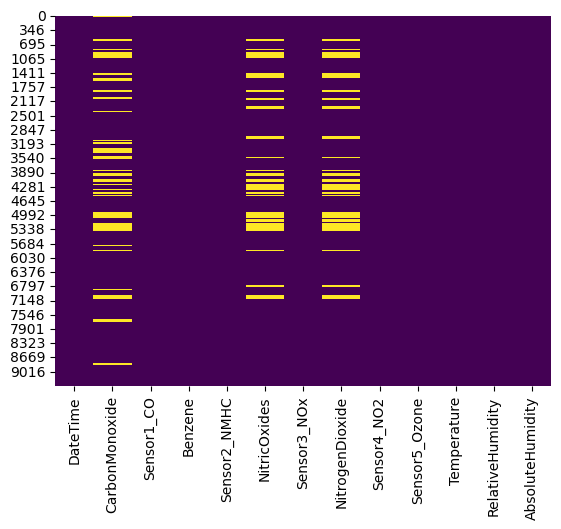

In [112]:
sns.heatmap(air_data.isnull(), cmap = 'viridis',cbar=False)
plt.show()

### 💡
Each yellow strips corresponds to missing data (NaN) in that column.

In [114]:
pre_air_data = air_data

### Hypothesis test for checking MCAR missing mechanism
Hypothesis test to check whether the missing value follows MCAR(Missing Completely at Random).
If it is not we can use any imputation method based on relationship of missing value with other attributes.

In [116]:
from scipy.stats import ttest_ind

# Example: Test for MCAR in CarbonMonoxide
observed_temp = air_data[air_data['CarbonMonoxide'].notnull()]['Temperature']
missing_temp = air_data[air_data['CarbonMonoxide'].isnull()]['Temperature']

t_stat, p_value = ttest_ind(observed_temp, missing_temp, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value > 0.05:
    print("Fail to reject H0: Data is MCAR.")
else:
    print("Reject H0: Data is not MCAR.")

T-statistic: -12.516842288028387, P-value: 1.1961471045875775e-35
Reject H0: Data is not MCAR.


In [121]:
from scipy.stats import ttest_ind

# Example: Test for MCAR in CarbonMonoxide
observed_rh = air_data[air_data['CarbonMonoxide'].notnull()]['RelativeHumidity']
missing_rh = air_data[air_data['CarbonMonoxide'].isnull()]['RelativeHumidity']

t_stat, p_value = ttest_ind(observed_rh, missing_rh, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value > 0.05:
    print("Fail to reject H0: Data is MCAR.")
else:
    print("Reject H0: Data is not MCAR.")

T-statistic: -2.013666371639676, P-value: 0.044074316235458266
Reject H0: Data is not MCAR.


## Relationship of missing value with Temperature and Relative Humidity
Based on the domain knowledge,we choose to monitor missing value correlation with temperature and relative humidity because most of the sensors require a specific environmental condition to work optimally.

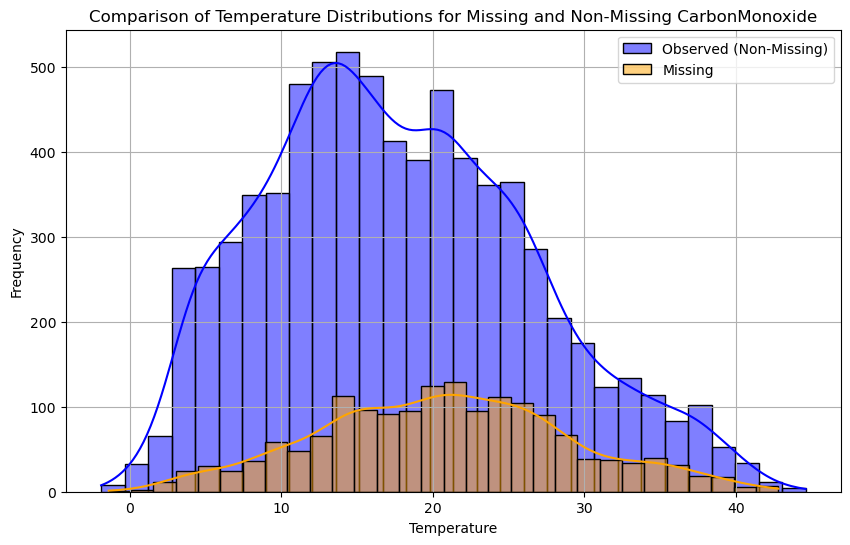

In [119]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(observed_temp, color='blue', kde=True, label='Observed (Non-Missing)', bins=30)
sns.histplot(missing_temp, color='orange', kde=True, label='Missing', bins=30)

# Add labels and title
plt.title('Comparison of Temperature Distributions for Missing and Non-Missing CarbonMonoxide')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

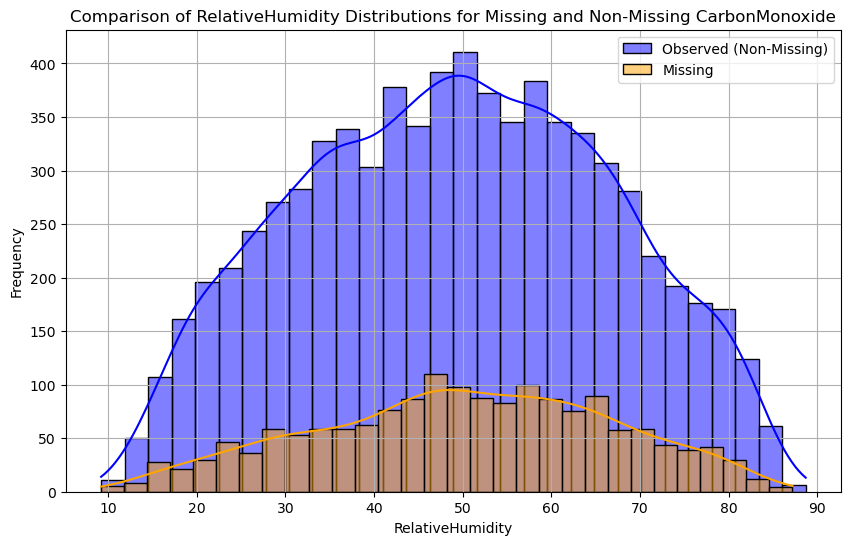

In [123]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(observed_rh, color='blue', kde=True, label='Observed (Non-Missing)', bins=30)
sns.histplot(missing_rh, color='orange', kde=True, label='Missing', bins=30)

# Add labels and title
plt.title('Comparison of RelativeHumidity Distributions for Missing and Non-Missing CarbonMonoxide')
plt.xlabel('RelativeHumidity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

###  💡
Using hypothesis test ,we rejected the MCAR missing mechanism . The differences in distribution(shown in the histogram) suggest that the missingness in CarbonMonoxide could depend on Temperature/(&RH ) (an observed variable), which supports  MAR (Missing At Random) mechanism. The same  observations can be derived for NitricOxides and NitrogenDioxide . But here objective is to choose two attributes which we can use for the imputation method and show why we choose them .We can infer this from their correlation heat map below.


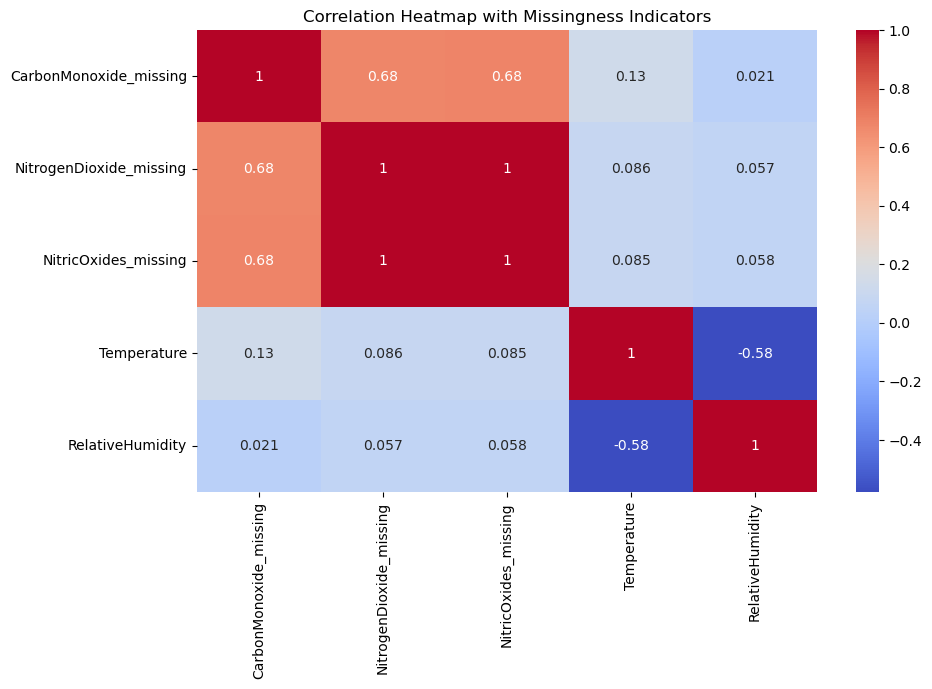

In [136]:
air_data['CarbonMonoxide_missing'] = air_data['CarbonMonoxide'].isnull().astype(int)
air_data['NitrogenDioxide_missing'] = air_data['NitrogenDioxide'].isnull().astype(int)
air_data['NitricOxides_missing'] = air_data['NitricOxides'].isnull().astype(int)

corr_ip = air_data[['CarbonMonoxide_missing','NitrogenDioxide_missing','NitricOxides_missing','Temperature', 'RelativeHumidity']]
plt.figure(figsize=(10, 6))
corr_matrix = corr_ip.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with Missingness Indicators")
plt.show()

### Inference on Missing Mechanism 
**Not MCAR**:
The strong correlation between missingness indicators suggests the data is not MCAR (Missing Completely At Random). In MCAR, the missingness would be entirely random and independent of any variable.

**Likely MAR**:
The weak correlations with observed variables (Temperature and RelativeHumidity) point toward MAR (Missing At Random), where the missingness depends on observed variables.

**No Strong Evidence for MNAR**:
There is no clear evidence that missingness depends on the unobserved values of the missing variables themselves, ruling out MNAR for now.


In [142]:
#data backup
air_quality = air_data

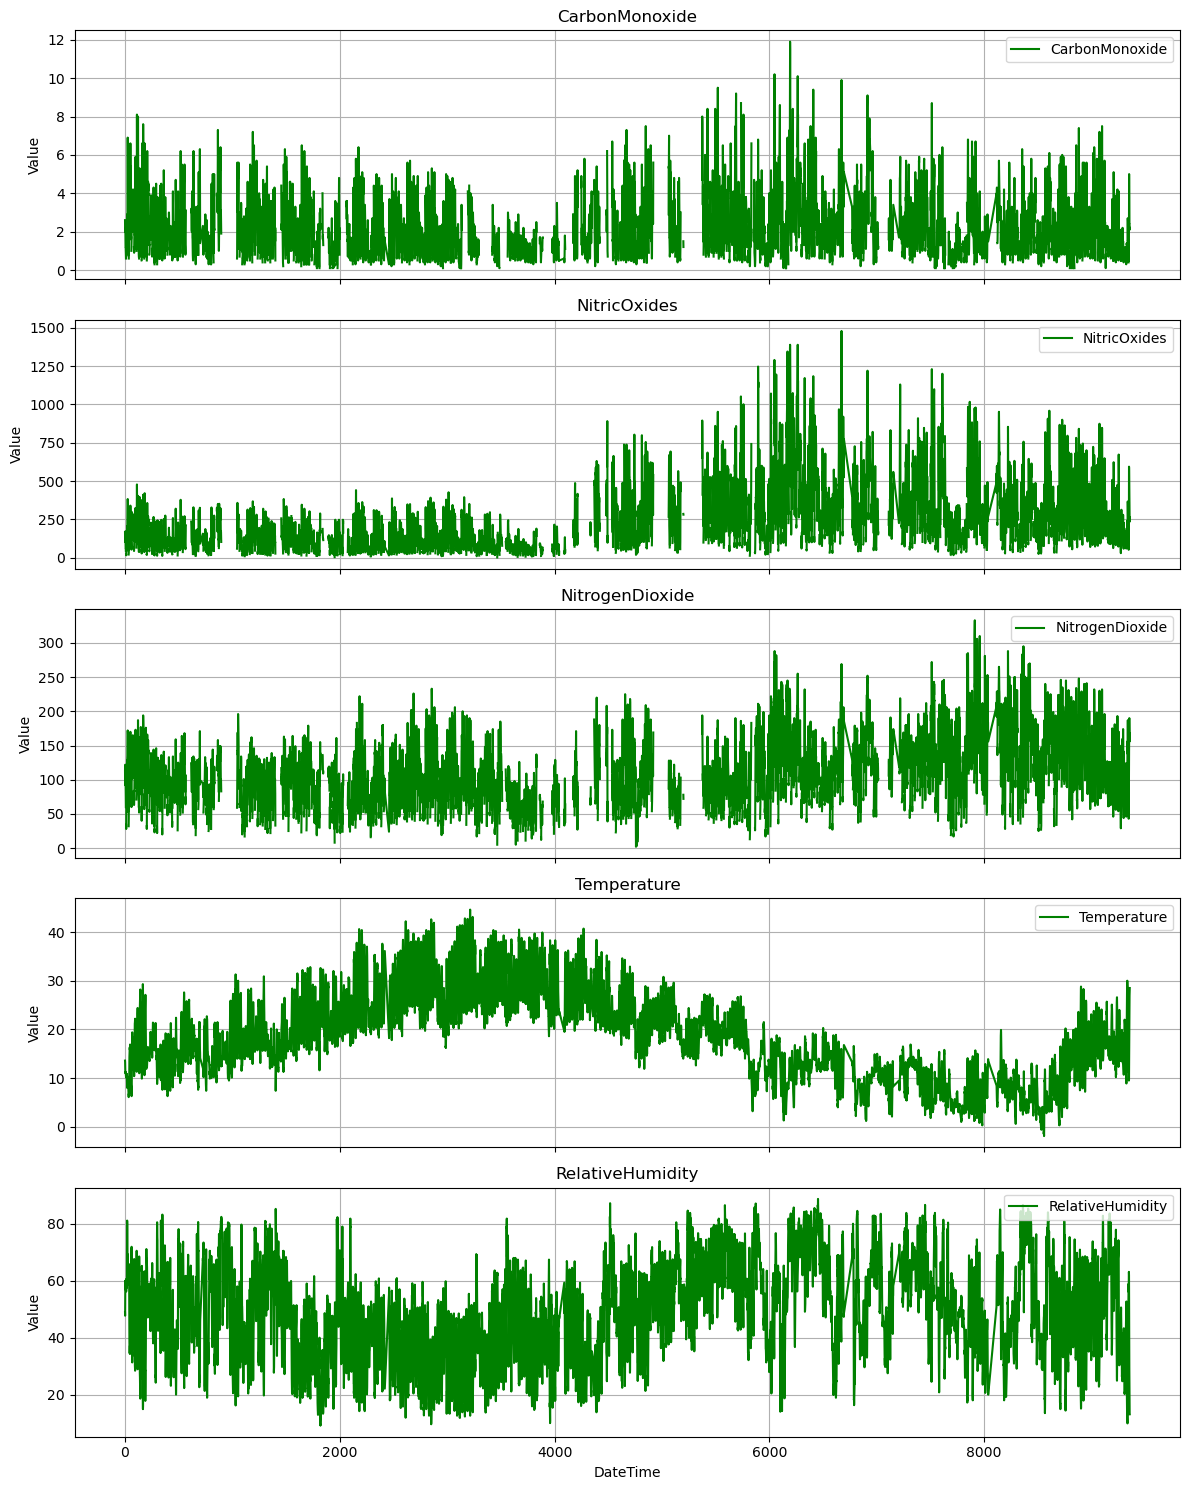

In [144]:

# Select the required columns
selected_columns = ['CarbonMonoxide', 'NitricOxides', 'NitrogenDioxide', 'Temperature', 'RelativeHumidity']

# Create subplots
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(12, 15), sharex=True)

# Plot each column
for i, column in enumerate(selected_columns):
    axes[i].plot(air_data.index, air_data[column],linestyle='-', label=column,color='green')
    axes[i].set_title(column)
    axes[i].set_ylabel("Value")
    axes[i].grid(True)
    axes[i].legend(loc='upper right')
    
# Set common x-axis label
plt.xlabel("DateTime")
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

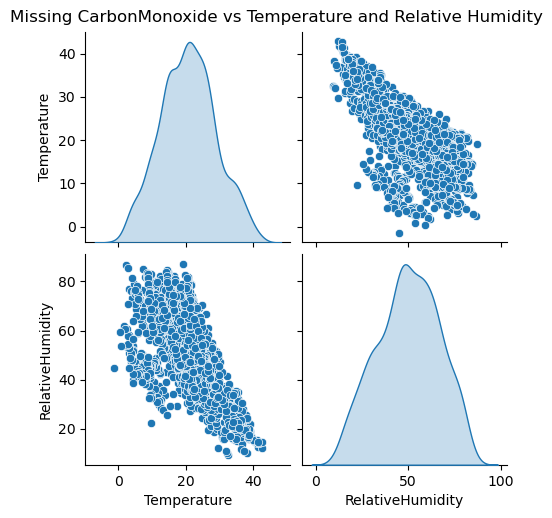

In [146]:
# Filter rows where CarbonMonoxide is missing
missing_data = air_data[air_data['CarbonMonoxide'].isnull()]

# Pairplot for missing data against Temperature and RelativeHumidity
sns.pairplot(
    missing_data, 
    vars=['Temperature', 'RelativeHumidity'], 
    diag_kind='kde'
)
plt.suptitle("Missing CarbonMonoxide vs Temperature and Relative Humidity", y=1.02)
plt.show()

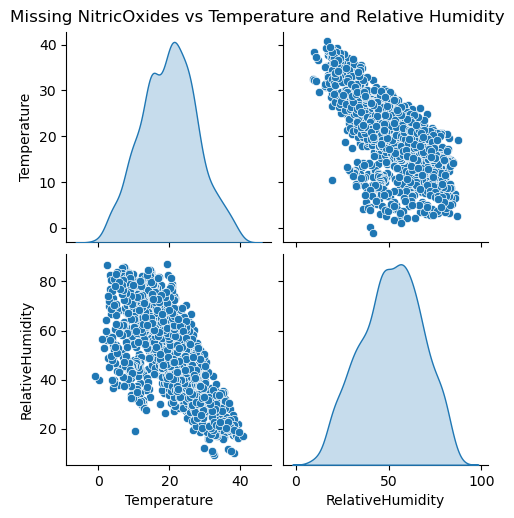

In [148]:
# Filter rows where NitricOxides is missing
missing_data = air_data[air_data['NitricOxides'].isnull()]

# Pairplot for missing data against Temperature and RelativeHumidity
sns.pairplot(
    missing_data, 
    vars=['Temperature', 'RelativeHumidity'], 
    diag_kind='kde'
)
plt.suptitle("Missing NitricOxides vs Temperature and Relative Humidity", y=1.02)
plt.show()

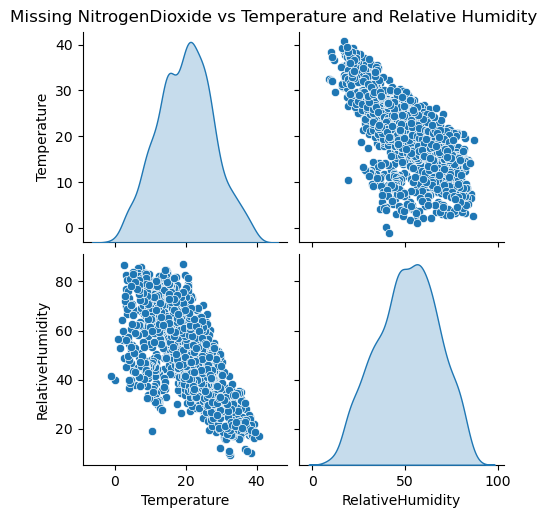

In [150]:
# Filter rows where NitrogenDioxide is missing
missing_data = air_data[air_data['NitrogenDioxide'].isnull()]

# Pairplot for missing data against Temperature and RelativeHumidity
sns.pairplot(
    missing_data, 
    vars=['Temperature', 'RelativeHumidity'], 
    diag_kind='kde'
)
plt.suptitle("Missing NitrogenDioxide vs Temperature and Relative Humidity", y=1.02)
plt.show()

### Interpreting these plots
**Scatter plot**
 * X-axis: Temperature (independent variable).
 * Y-axis: RelativeHumidity (dependent variable).
 * Interpretation:
A negative correlation is observed in the scatter plot. As Temperature increases, RelativeHumidity tends to decrease.
This relationship suggests that the missing values in three columns occur during specific environmental conditions (e.g., hot and dry or cold and humid).


In the **distribution plot of Temperature** (top-left plot in the pairplot), the axes are as follows:

* X-axis: Temperature (independent variable).
* Y-axis: density of the Temperature values. (dependent variable).

This shows the range of Temperature values for rows where CarbonMonoxide is missing.

In the **distribution plot of RelativeHumidity** (right-bottom plot in the pairplot), the axes are as follows:

* X-axis: RelativeHumidity (independent variable).
* Y-axis: density of the RelativeHumidity values. (dependent variable).

This shows the range of RelativeHumidity values for rows where CarbonMonoxide is missing.


1. **Relationship Between Temperature and RelativeHumidity**
There seems to be a strong negative correlation between Temperature and RelativeHumidity for the rows with missing CarbonMonoxide.
This suggests that rows with missing CarbonMonoxide might occur during specific environmental conditions, such as high temperature and low humidity or low temperature and high humidity.

2. **Distribution of Temperature**
The distribution of Temperature (top-left plot) appears unimodal and concentrated between 10°C and 30°C for rows with missing CarbonMonoxide.
Missing CarbonMonoxide values are more frequent in moderate temperature ranges, suggesting that missingness may be dependent on Temperature (MAR).

4. **Distribution of RelativeHumidity**
The distribution of RelativeHumidity (bottom-right plot) shows a broader range, mostly concentrated between 20% and 80%.
Missingness in CarbonMonoxide might also depend on the variability in RelativeHumidity.

5. **Dependency on Both Features**
The scatter plots (off-diagonal) show clear relationships between Temperature and RelativeHumidity during missingness.
The missingness of CarbonMonoxide likely depends on a combination of Temperature and RelativeHumidity, supporting the hypothesis of MAR (Missing At Random).


The same observations can be derived from *NitrogenDioxide* and *NitricOxides* . 

## Imputation

In [155]:
features_for_imputation = ['CarbonMonoxide', 'NitricOxides', 'NitrogenDioxide', 'Temperature', 'RelativeHumidity']

# Create a copy of the data for imputation
imputation_data = air_data[features_for_imputation]

# Initialize the Iterative Imputer
imputer = IterativeImputer(random_state=42, max_iter=10)

# Fit and transform the data
imputed_data = pd.DataFrame(imputer.fit_transform(imputation_data), columns=features_for_imputation, index=air_data.index)

# Replace original data with imputed data
air_data[features_for_imputation] = imputed_data

# Check for missing values after imputation
print("Missing values after imputation:")
print(air_data[features_for_imputation].isnull().sum())

Missing values after imputation:
CarbonMonoxide      0
NitricOxides        0
NitrogenDioxide     0
Temperature         0
RelativeHumidity    0
dtype: int64


C:\Users\adwai\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Post Imputation Validation

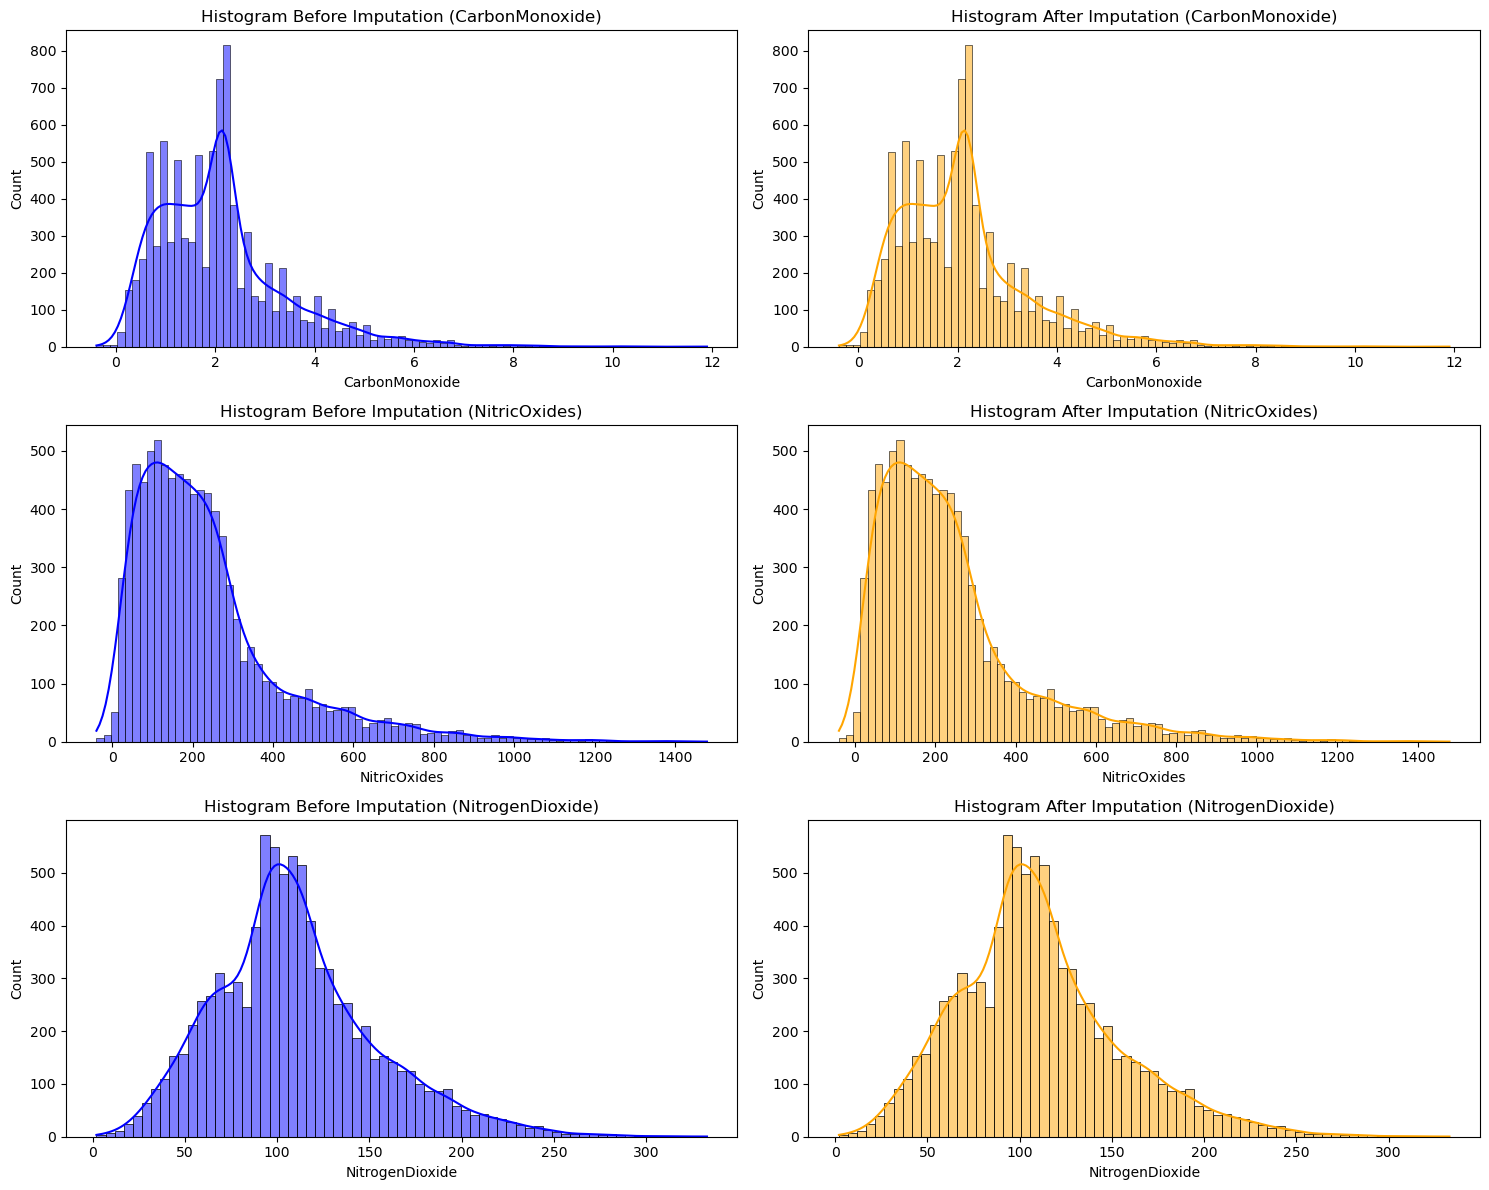

In [162]:
# Select columns for validation
selected_columns = ['CarbonMonoxide', 'NitricOxides', 'NitrogenDioxide']



# Create subplots
fig, axes = plt.subplots(len(selected_columns), 2, figsize=(15, 12))

# Plot each column's histogram before and after imputation
for i, column in enumerate(selected_columns):
    # Histogram Before Imputation
    sns.histplot(data=air_quality, x=column, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f"Histogram Before Imputation ({column})")

    # Histogram After Imputation
    sns.histplot(data=air_data, x=column, kde=True, ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f"Histogram After Imputation ({column})")

# Adjust layout
plt.tight_layout()
plt.show()

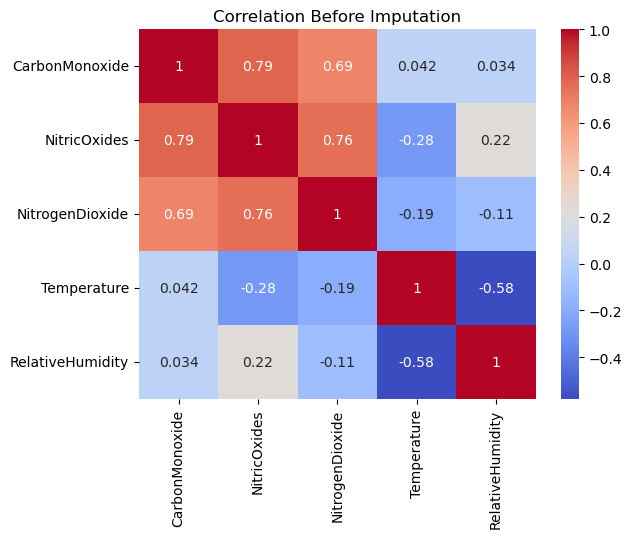

In [176]:
sns.heatmap(air_quality[features_for_imputation].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Before Imputation")
plt.show()

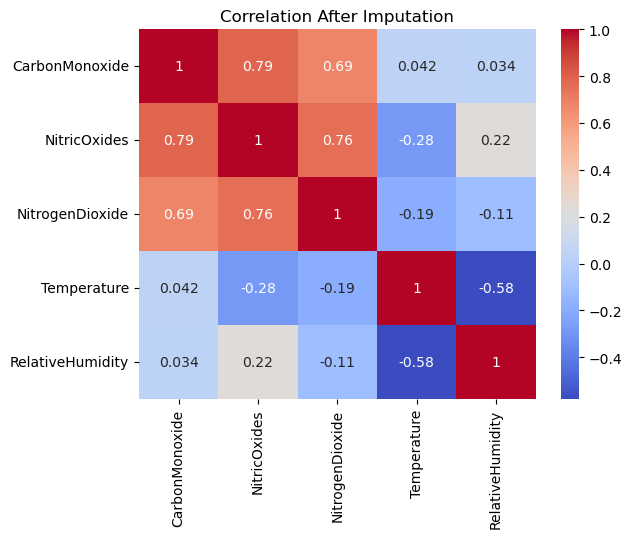

In [174]:
sns.heatmap(air_data[features_for_imputation].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation After Imputation")
plt.show()

In [187]:
#Check before and after mean
print(f" CarbonMonoxide: Before Mean: { air_quality['CarbonMonoxide'].mean()}, After Mean: {air_data['CarbonMonoxide'].mean()}")
print(f" NitricOxides : Before Mean: { air_quality['NitricOxides'].mean()}, After Mean: {air_data['NitricOxides'].mean()}")
print(f" NitrogenDioxide :Before Mean: { air_quality['NitrogenDioxide'].mean()}, After Mean: {air_data['NitrogenDioxide'].mean()}")

 CarbonMonoxide: Before Mean: 2.099009866908346, After Mean: 2.099009866908346
 NitricOxides : Before Mean: 235.40591334494835, After Mean: 235.40591334494835
 NitrogenDioxide :Before Mean: 109.94039255400858, After Mean: 109.94039255400858


### 🤞
The imputation has been successfully integrated into the data without distorting the distributions for these variables.
The lack of visual differences implies that the imputation method has done a good job of preserving the original patterns in the data.

## EDA After Impution value

In [195]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DateTime                 8991 non-null   datetime64[ns]
 1   CarbonMonoxide           8991 non-null   float64       
 2   Sensor1_CO               8991 non-null   float64       
 3   Benzene                  8991 non-null   float64       
 4   Sensor2_NMHC             8991 non-null   float64       
 5   NitricOxides             8991 non-null   float64       
 6   Sensor3_NOx              8991 non-null   float64       
 7   NitrogenDioxide          8991 non-null   float64       
 8   Sensor4_NO2              8991 non-null   float64       
 9   Sensor5_Ozone            8991 non-null   float64       
 10  Temperature              8991 non-null   float64       
 11  RelativeHumidity         8991 non-null   float64       
 12  AbsoluteHumidity         8991 non-null 

In [205]:
air_data.drop(['CarbonMonoxide_missing','NitrogenDioxide_missing','NitricOxides_missing'] ,axis=1 ,inplace=True )

In [207]:
air_data.shape    

(8991, 13)

In [209]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          8991 non-null   datetime64[ns]
 1   CarbonMonoxide    8991 non-null   float64       
 2   Sensor1_CO        8991 non-null   float64       
 3   Benzene           8991 non-null   float64       
 4   Sensor2_NMHC      8991 non-null   float64       
 5   NitricOxides      8991 non-null   float64       
 6   Sensor3_NOx       8991 non-null   float64       
 7   NitrogenDioxide   8991 non-null   float64       
 8   Sensor4_NO2       8991 non-null   float64       
 9   Sensor5_Ozone     8991 non-null   float64       
 10  Temperature       8991 non-null   float64       
 11  RelativeHumidity  8991 non-null   float64       
 12  AbsoluteHumidity  8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 1.2 MB


In [211]:
air_data.describe()

DateTime  CarbonMonoxide   Sensor1_CO  \
count                           8991     8991.000000  8991.000000   
mean   2004-09-20 04:59:35.175175296        2.099010  1099.833166   
min              2004-03-10 18:00:00       -0.393164   647.000000   
25%              2004-06-14 02:30:00        1.115885   937.000000   
50%              2004-09-20 04:00:00        2.000000  1063.000000   
75%              2004-12-26 04:30:00        2.600000  1231.000000   
max              2005-04-04 14:00:00       11.900000  2040.000000   
std                              NaN        1.322954   217.080037   

           Benzene  Sensor2_NMHC  NitricOxides  Sensor3_NOx  NitrogenDioxide  \
count  8991.000000   8991.000000   8991.000000  8991.000000      8991.000000   
mean     10.083105    939.153376    235.405913   835.493605       109.940393   
min       0.100000    383.000000    -39.214440   322.000000         2.000000   
25%       4.400000    734.500000    105.000000   658.000000        81.000000   
50%       8.200000    909.000000    190.000000   806.000000       105.000000   
75%      14.000000   1116.000000    291.000000   969.500000       133.000000   
max      63.700000   2214.000000   1479.000000  2683.000000       333.000000   
std       7.449820    266.831429    190.904892   256.817320        44.145403   

       Sensor4_NO2  Sensor5_Ozone  Temperature  RelativeHumidity  \
count  8991.000000    8991.000000  8991.000000       8991.000000   
mean   1456.264598    1022.906128    18.317829         49.234201   
min     551.000000     221.000000    -1.900000          9.200000   
25%    1227.000000     731.500000    11.800000         35.800000   
50%    1463.000000     963.000000    17.800000         49.600000   
75%    1674.000000    1273.500000    24.400000         62.500000   
max    2775.000000    2523.000000    44.600000         88.700000   
std     346.206794     398.484288     8.832116         17.316892   

       AbsoluteHumidity  
count       8991.000000  
mean           1.025530  
min            0.184700  
25%            0.736800  
50%            0.995400  
75%            1.313700  
max            2.231000  
std            0.403813

### Outliers

In [219]:
#Check outliers
IQR =air_data.quantile(.75) - air_data.quantile(.25)
print(IQR)

DateTime            195 days 02:00:00
CarbonMonoxide               1.484115
Sensor1_CO                      294.0
Benzene                           9.6
Sensor2_NMHC                    381.5
NitricOxides                    186.0
Sensor3_NOx                     311.5
NitrogenDioxide                  52.0
Sensor4_NO2                     447.0
Sensor5_Ozone                   542.0
Temperature                      12.6
RelativeHumidity                 26.7
AbsoluteHumidity               0.5769
dtype: object


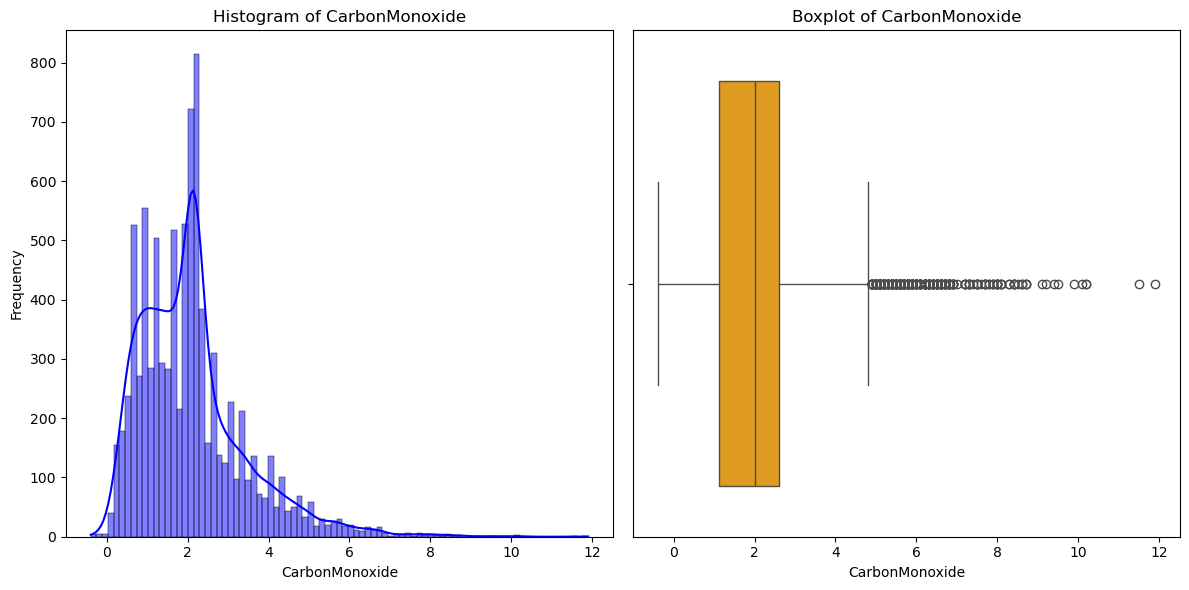

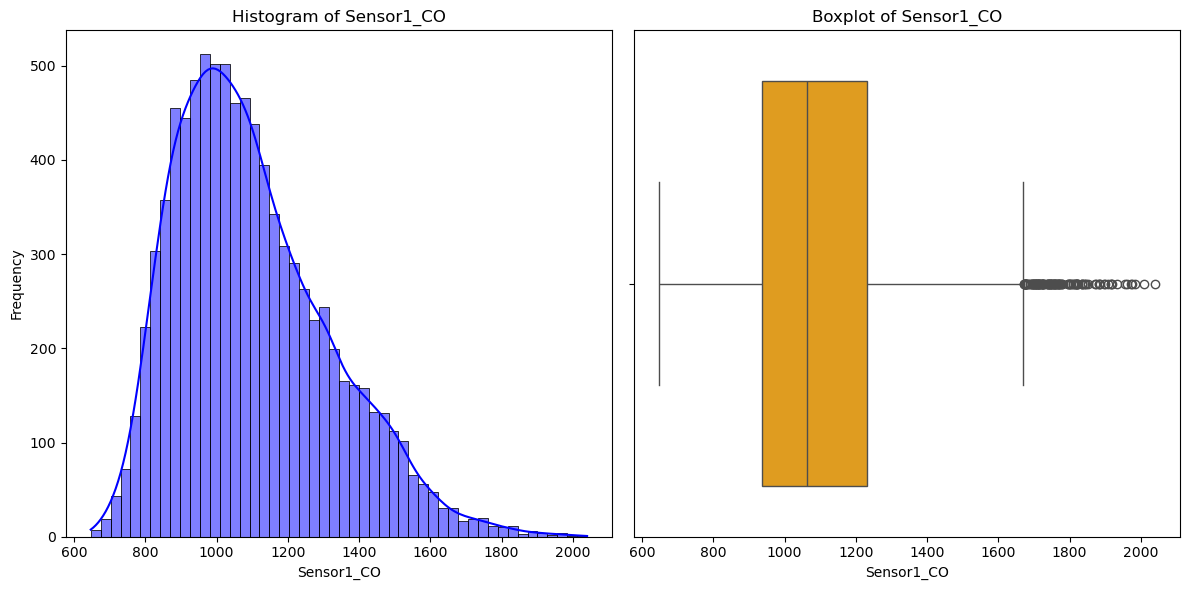

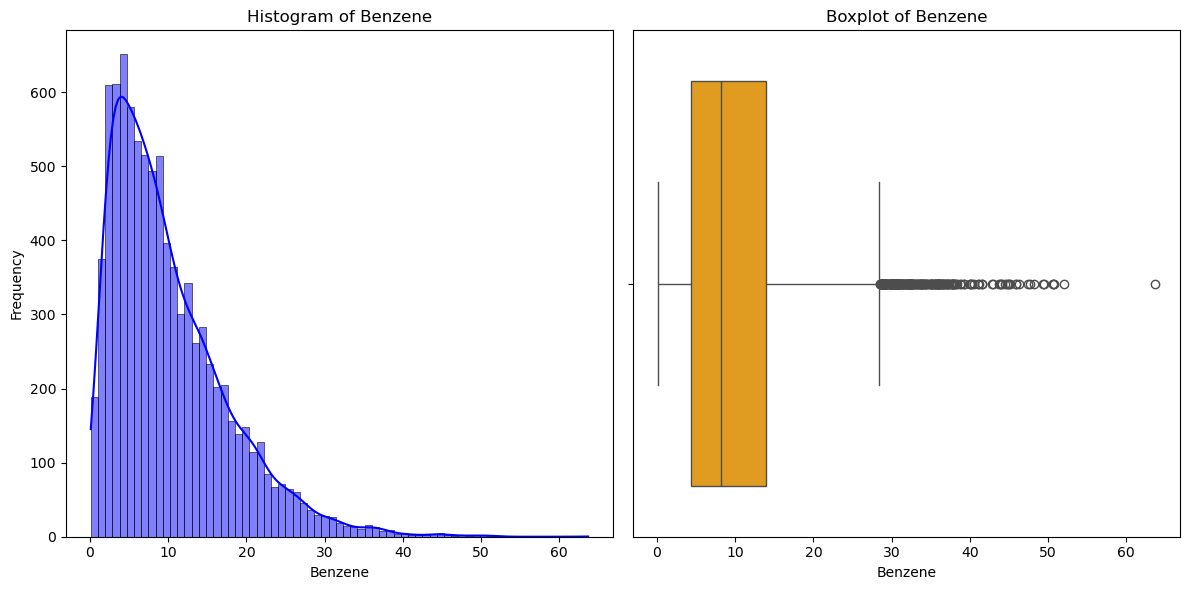

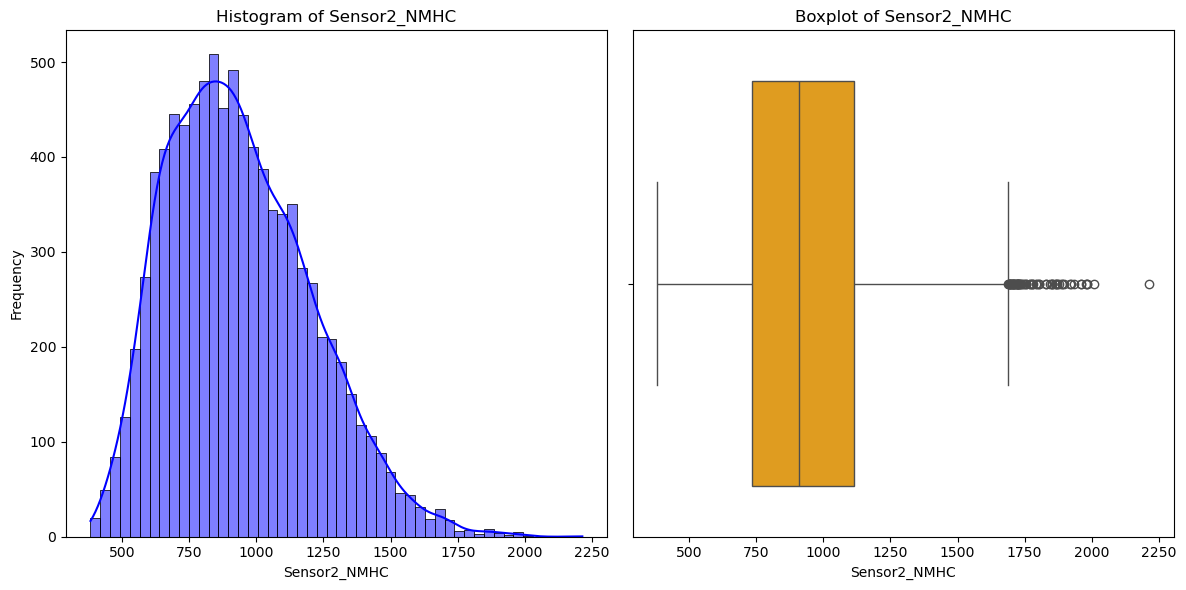

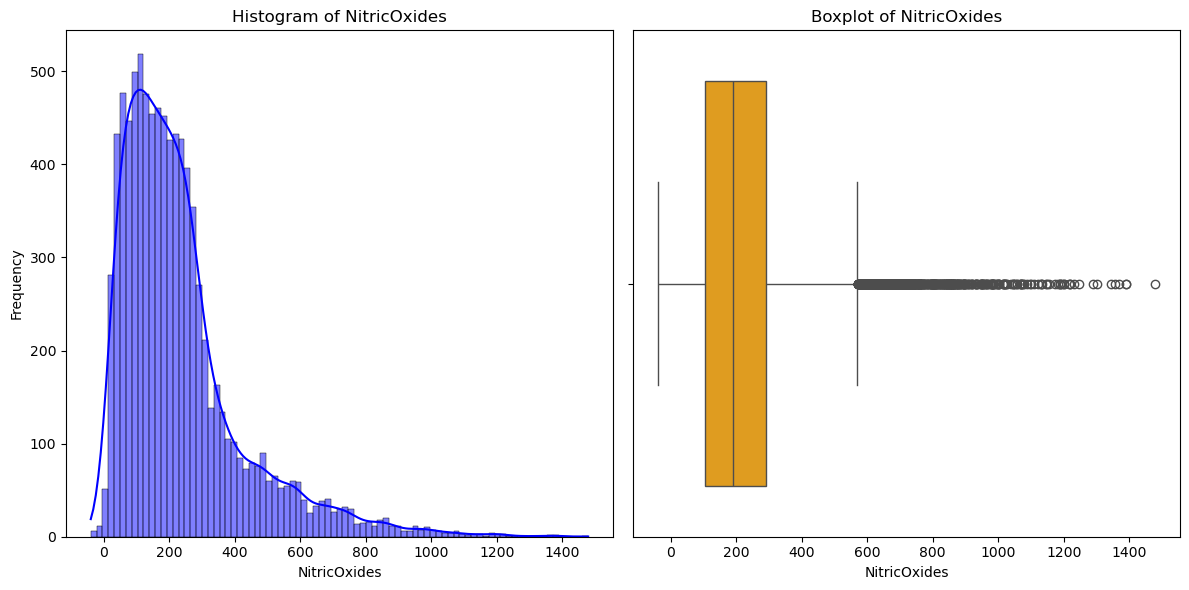

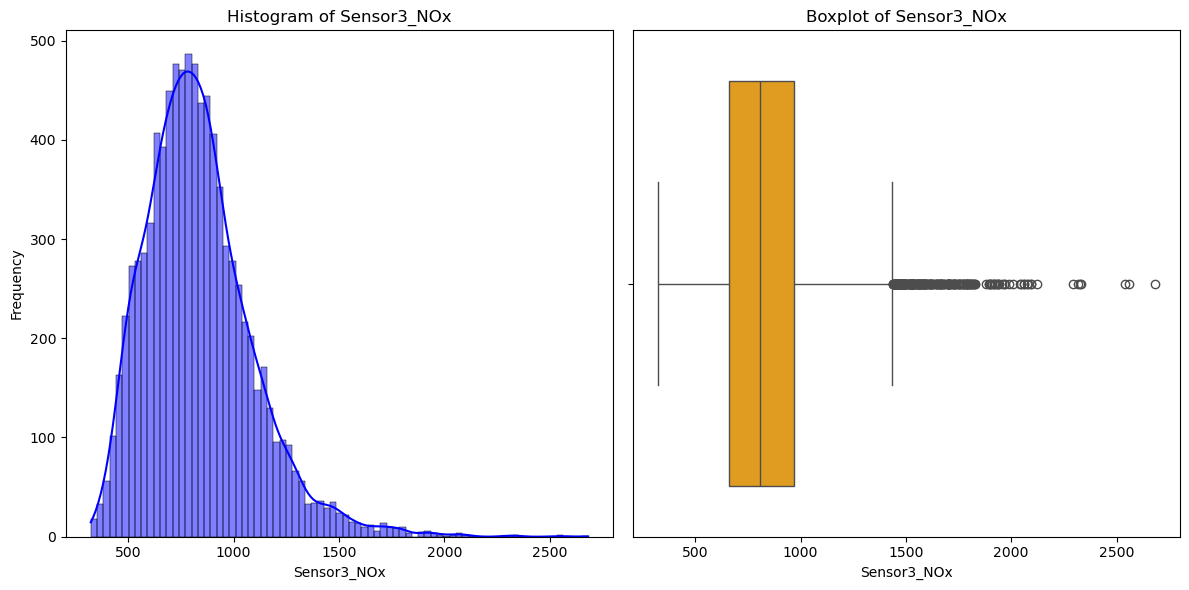

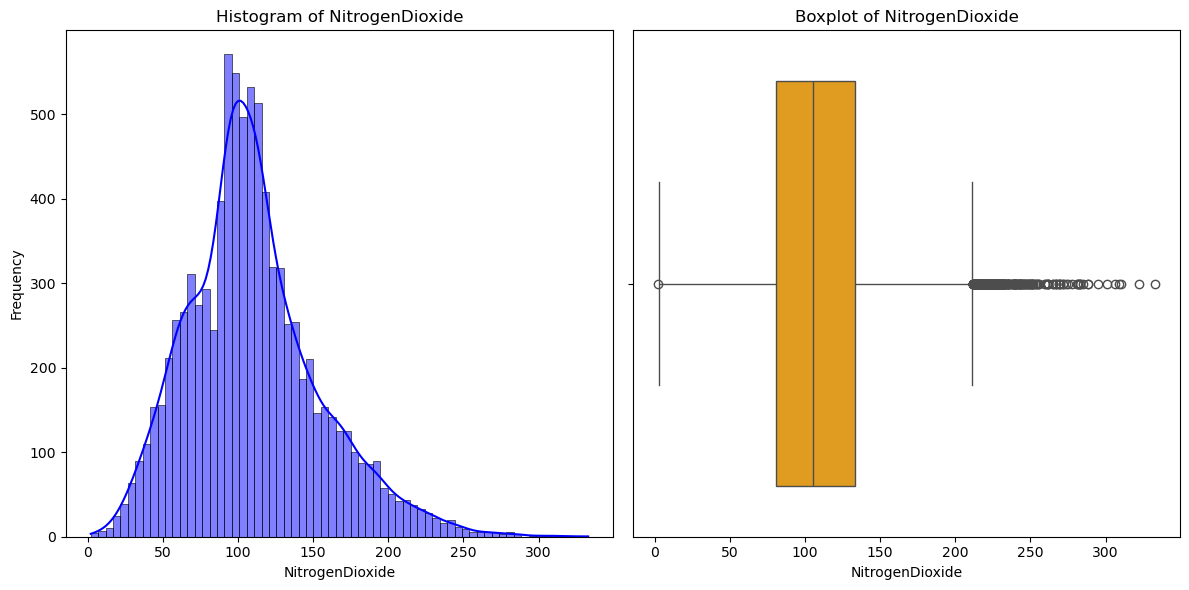

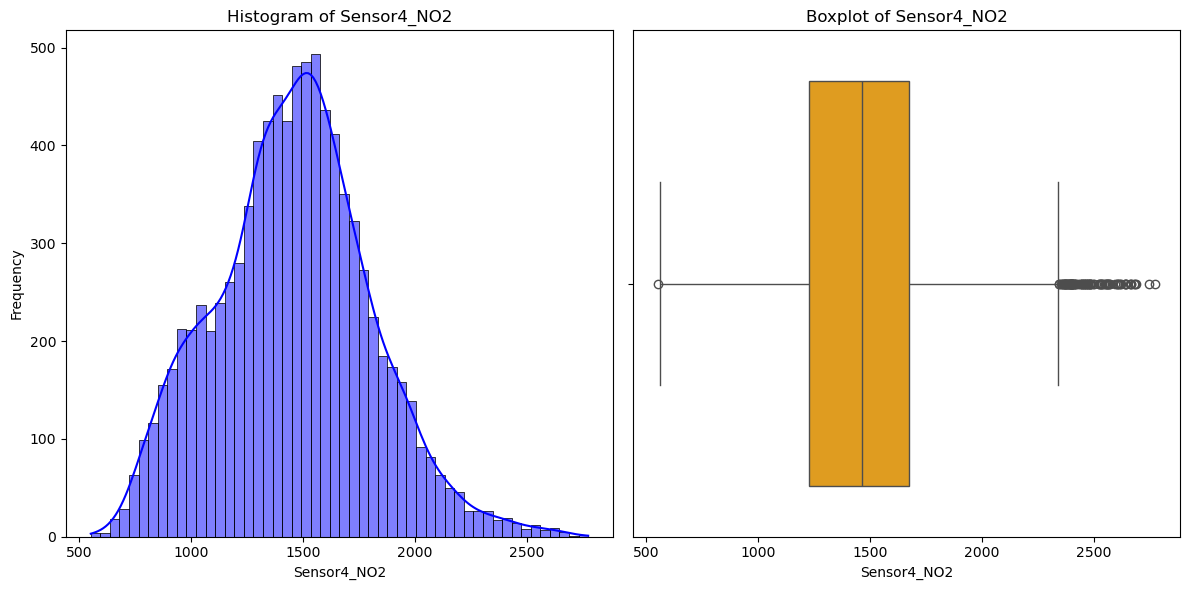

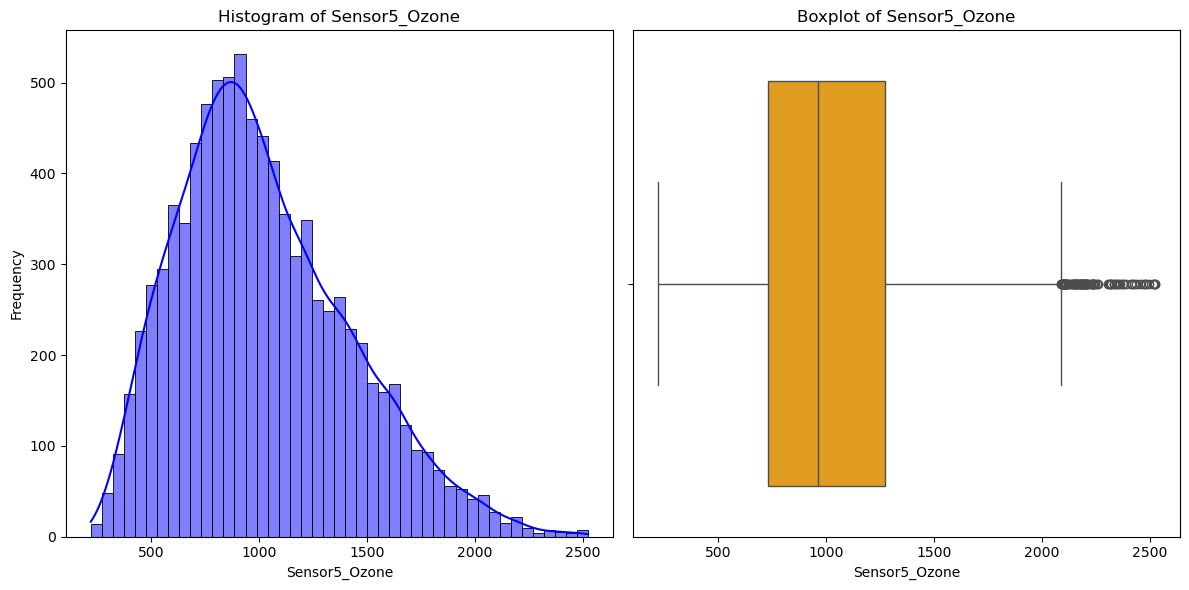

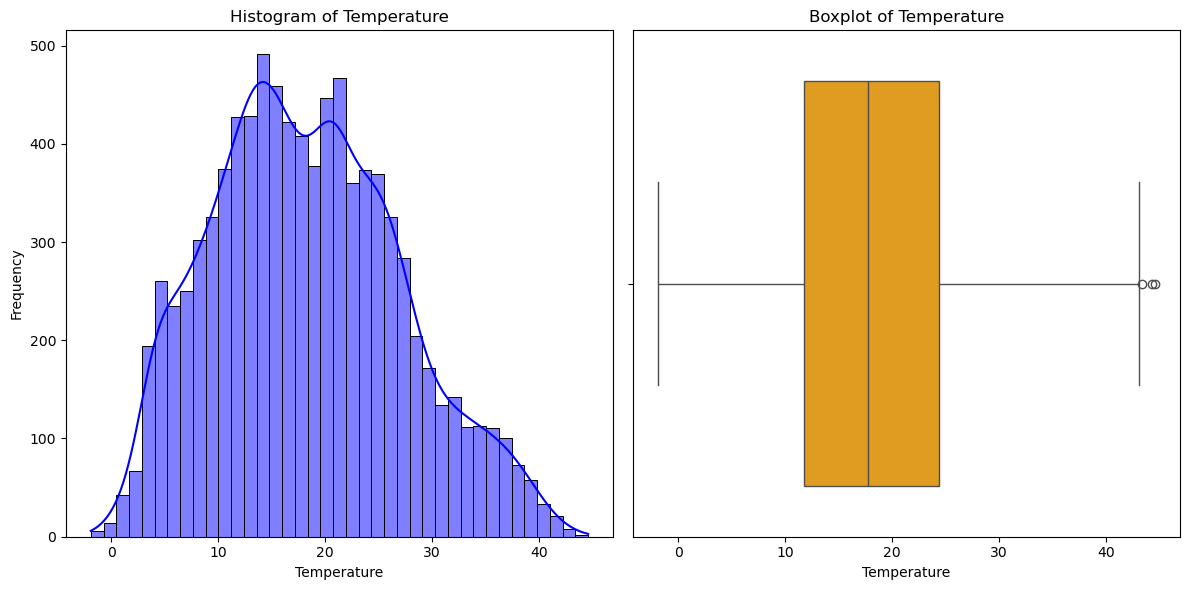

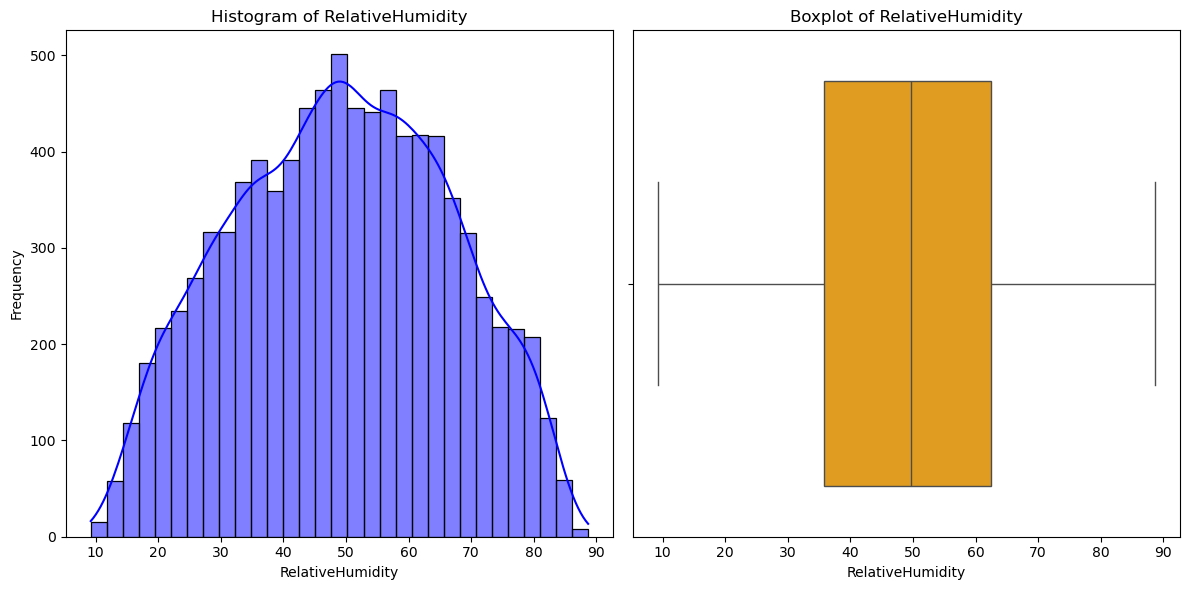

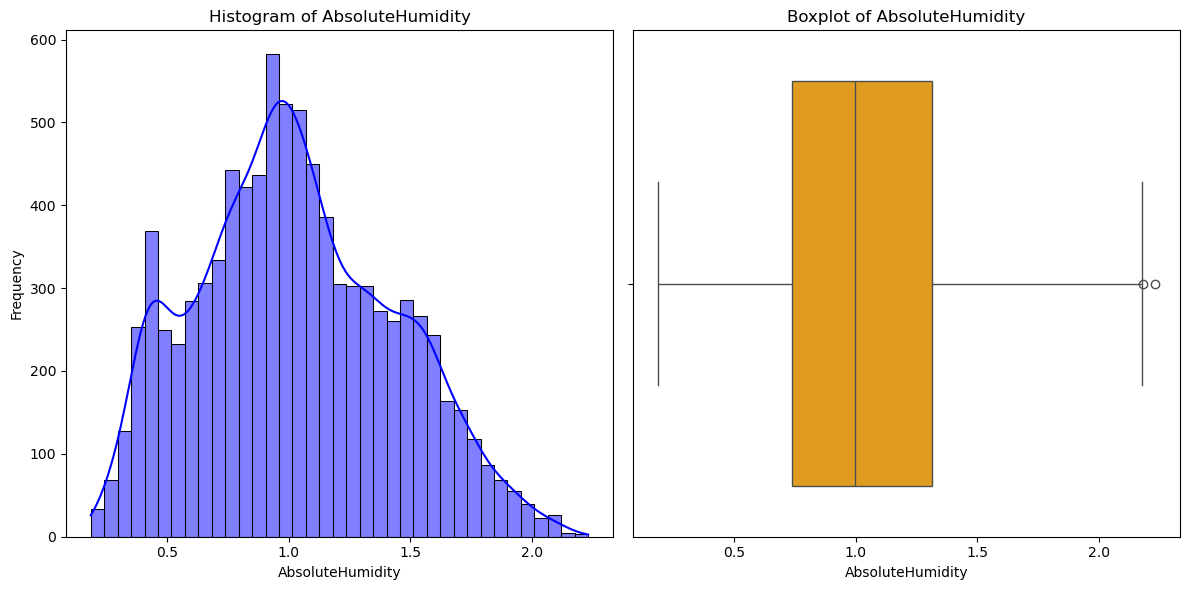

In [221]:
# Select numeric columns only
numeric_columns = air_data.select_dtypes(include=['float']).columns

# Loop through each column and create subplots
for column in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram on the left
    sns.histplot(data=air_data, x=column, kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot on the right
    sns.boxplot(data=air_data, x=column, ax=axes[1], color='orange')
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

### Filtering of Outliers

To deal with outliers ,we need understand the cause of it.Whether it's a valid datapoint or datta errors or it's a special case represnting a unique subset of data . Based on these understanding ,choose appropriate methods to deal with outliers .But here I am using IQR method which will remove outliers which are not relevent for my analysis .Outliers are defined as values below Q1−1.5×IQR or above 𝑄3+1.5 ×IQR .

In [233]:
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers from all numeric columns
numeric_columns = air_data.select_dtypes(include=['float', 'int']).columns
air_data_filtered = remove_outliers(air_data, numeric_columns)



In [235]:
print(f"Original data size: {air_data.shape}")
print(f"Cleaned data size: {air_data_cleaned.shape}")

Original data size: (8991, 13)
Cleaned data size: (7597, 13)


### 🤞
The outliers are succesfully filterd. Visualisation is given below

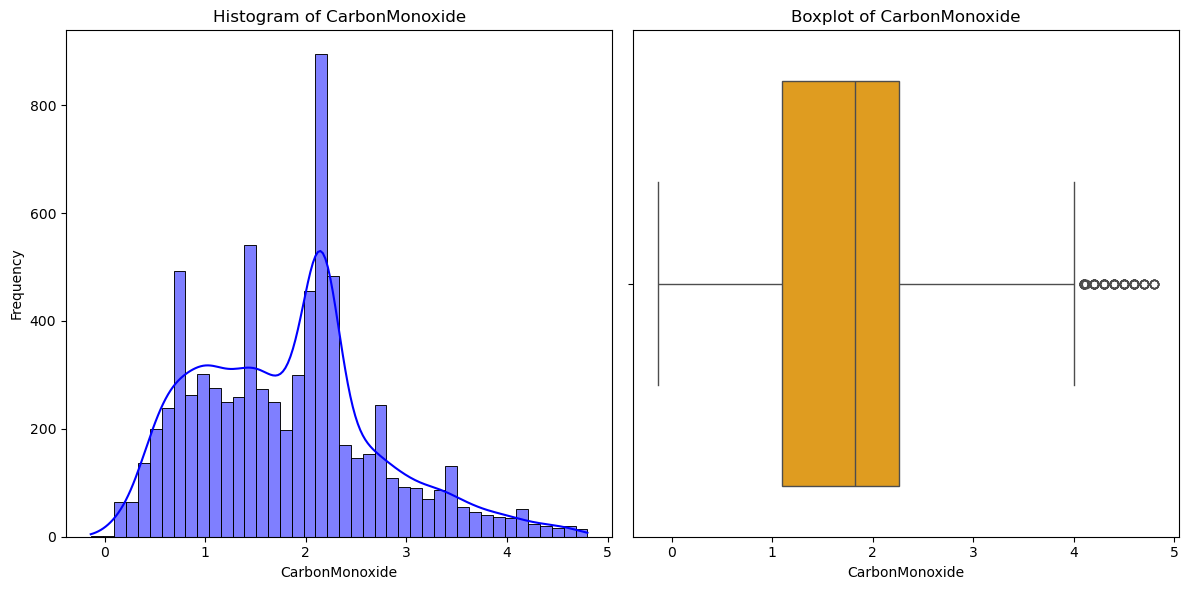

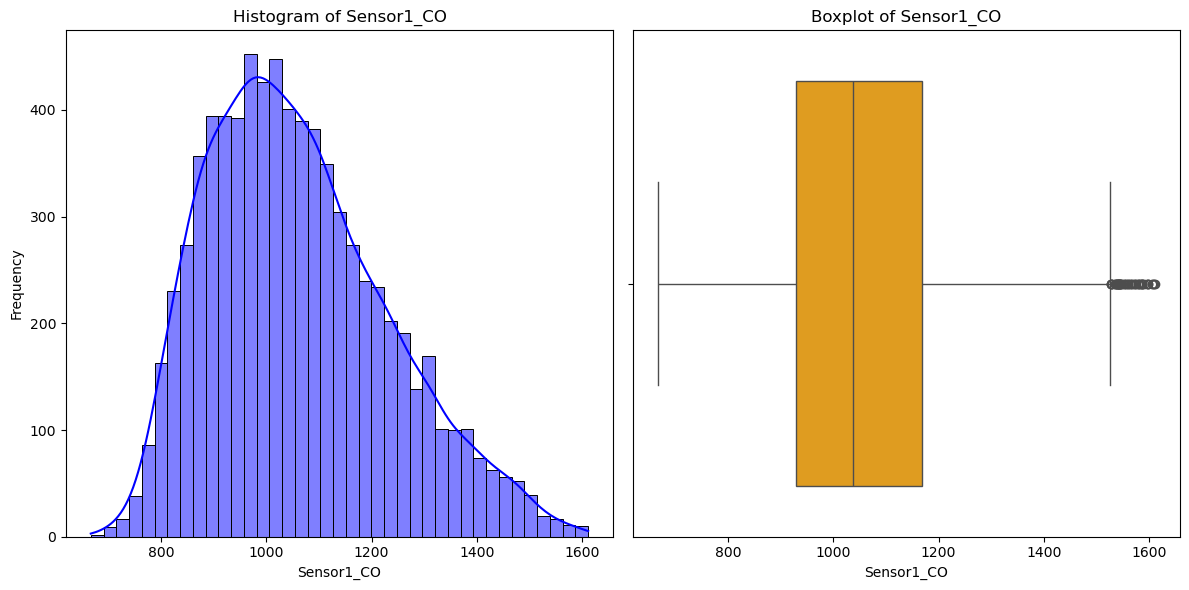

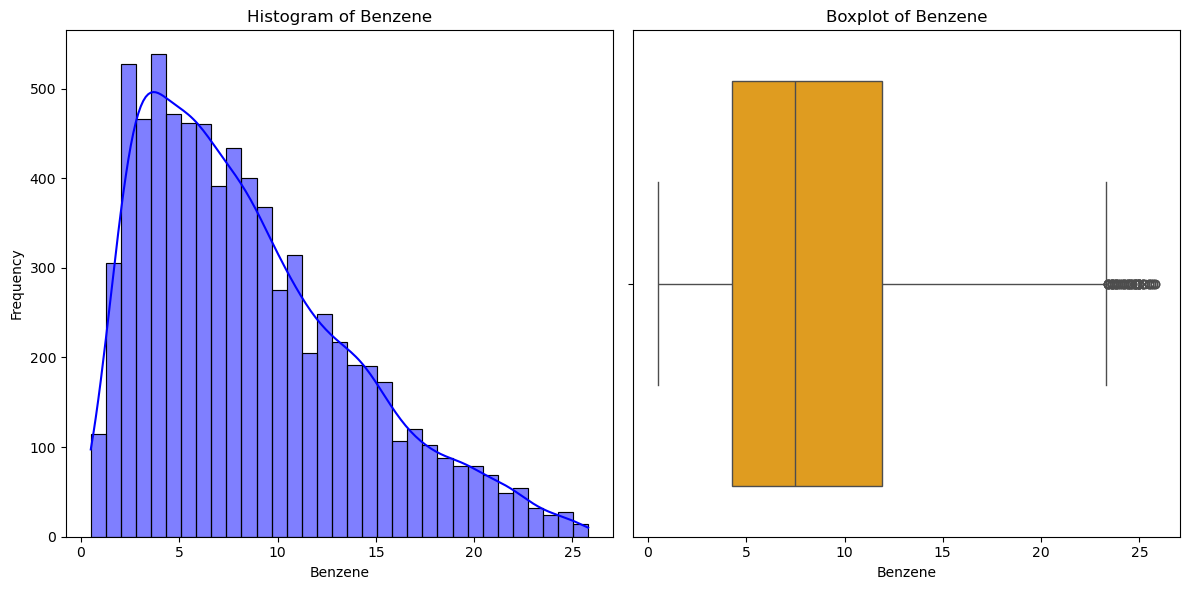

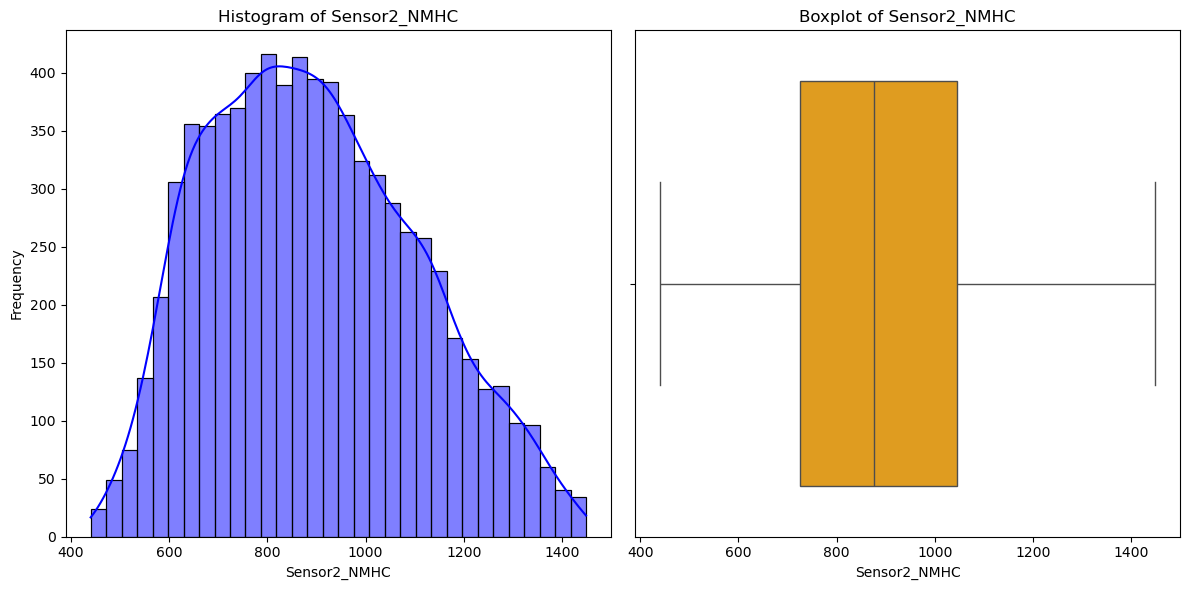

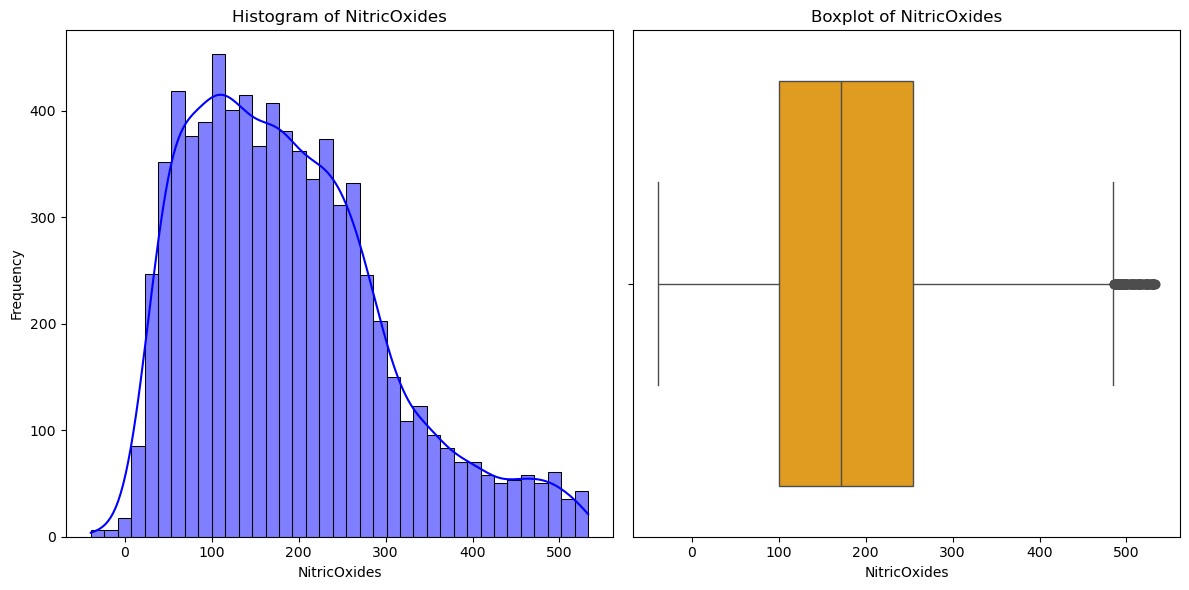

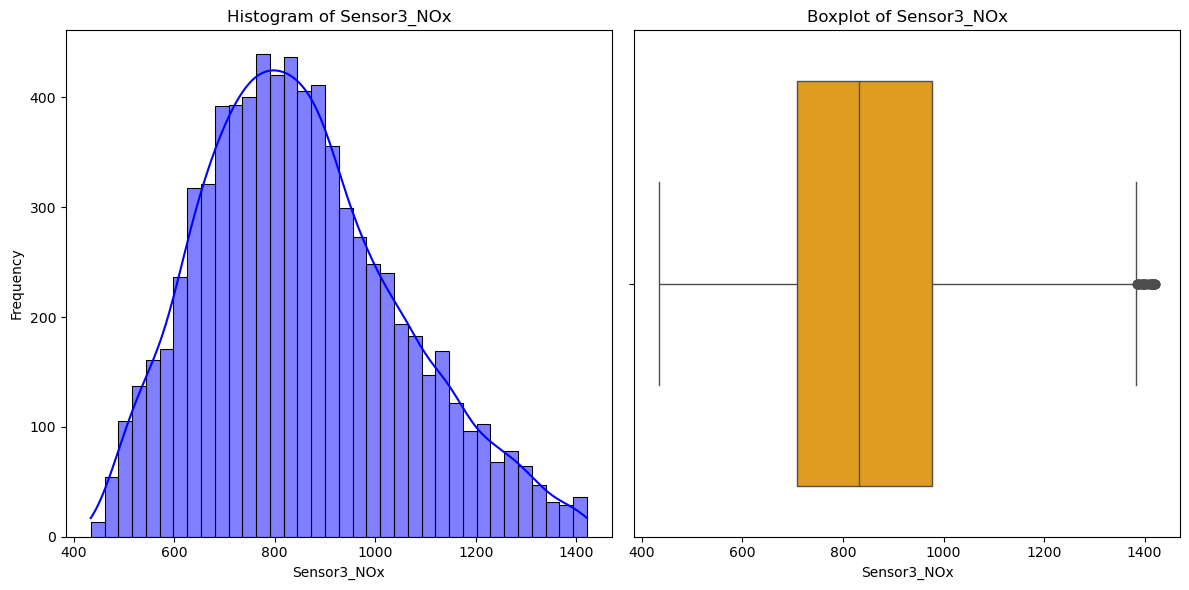

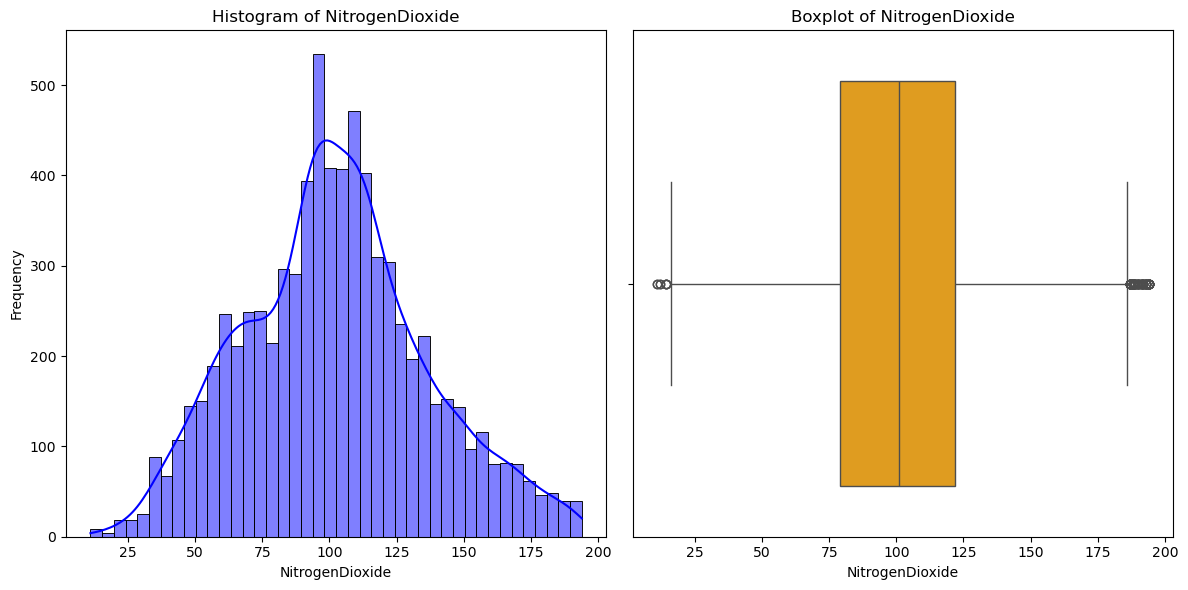

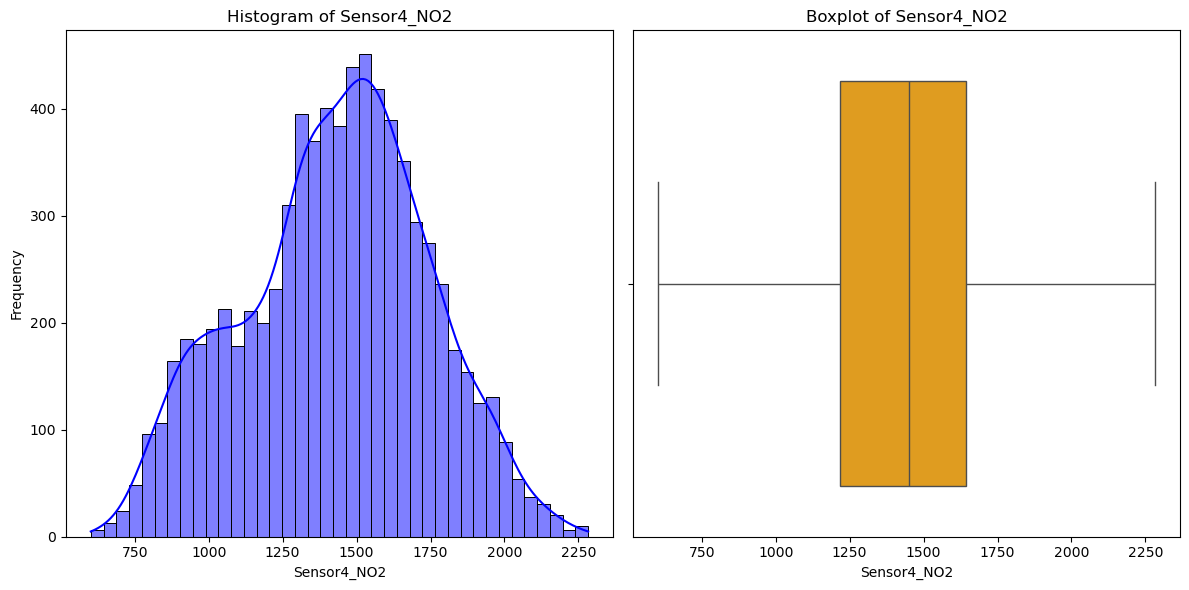

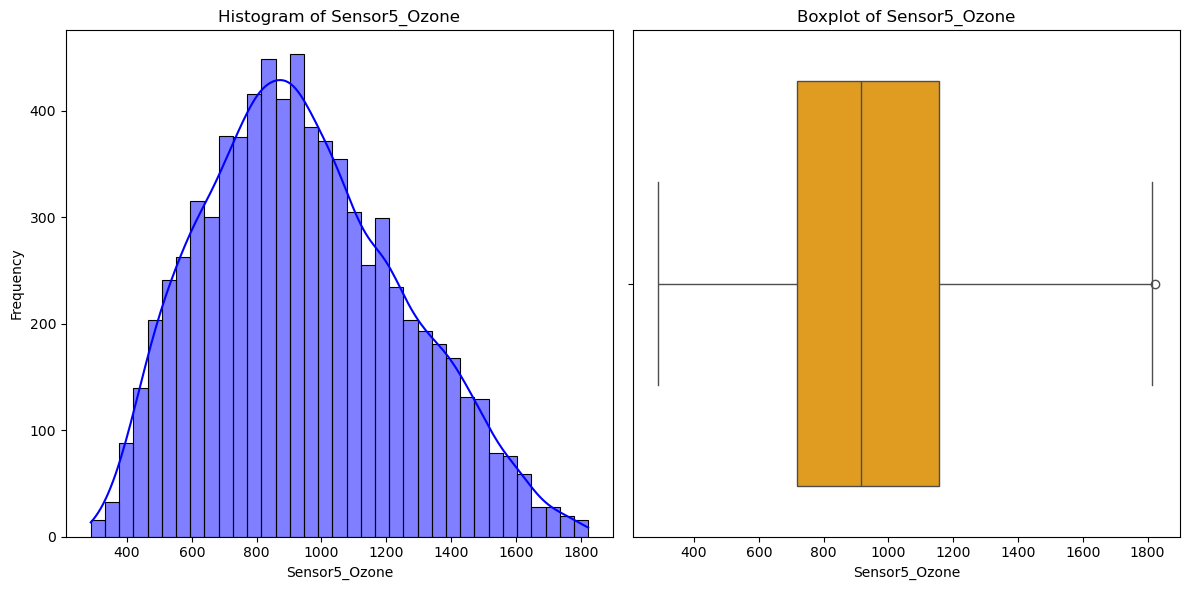

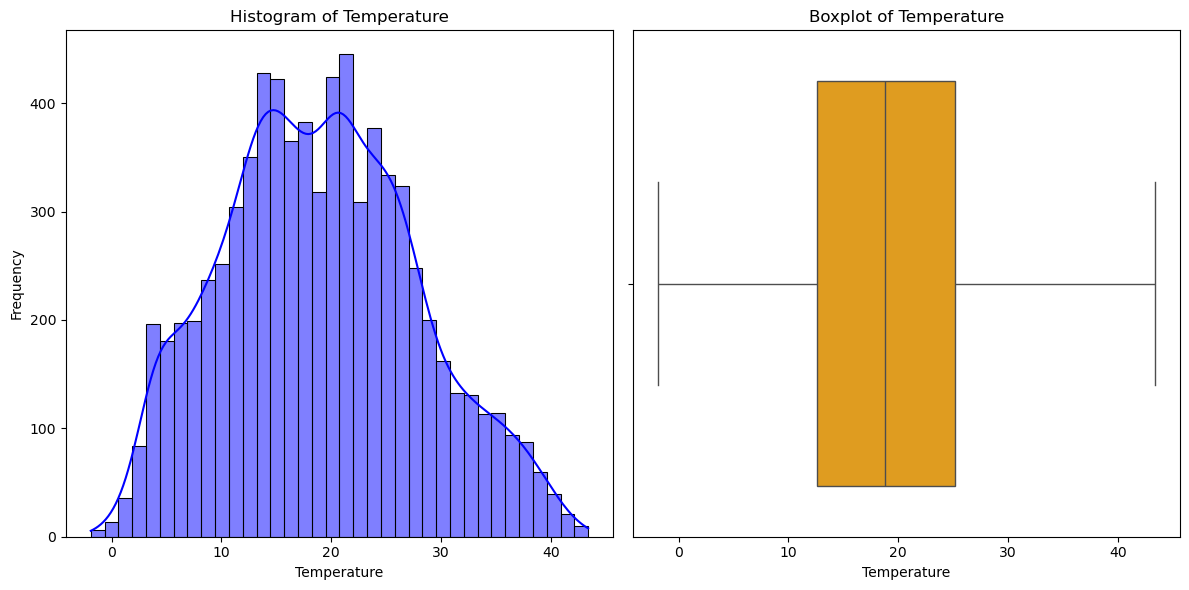

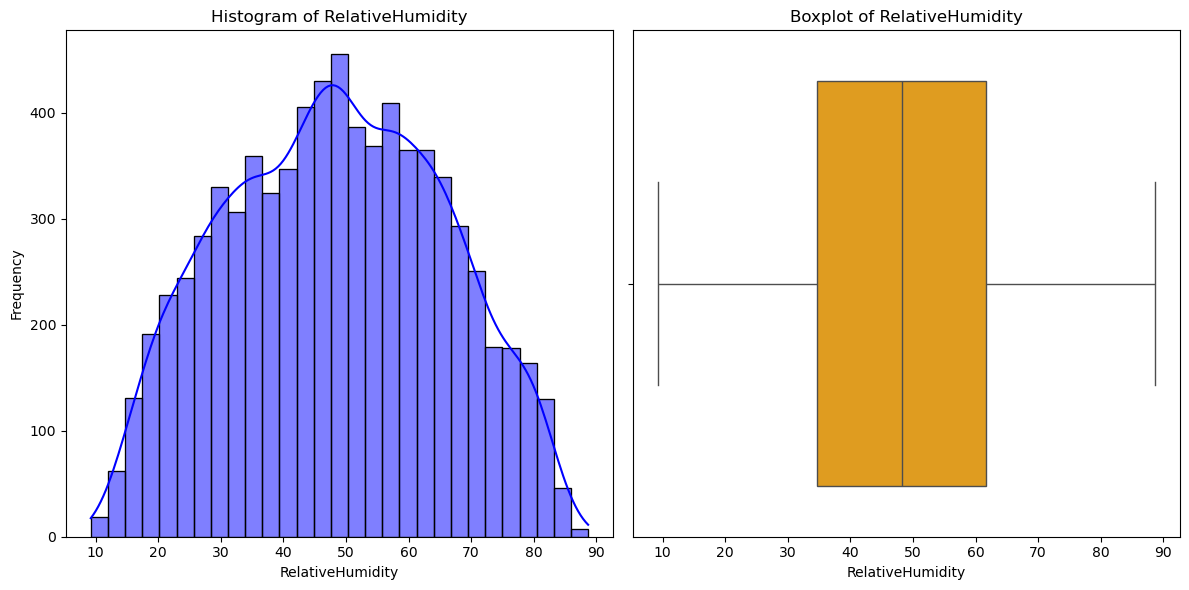

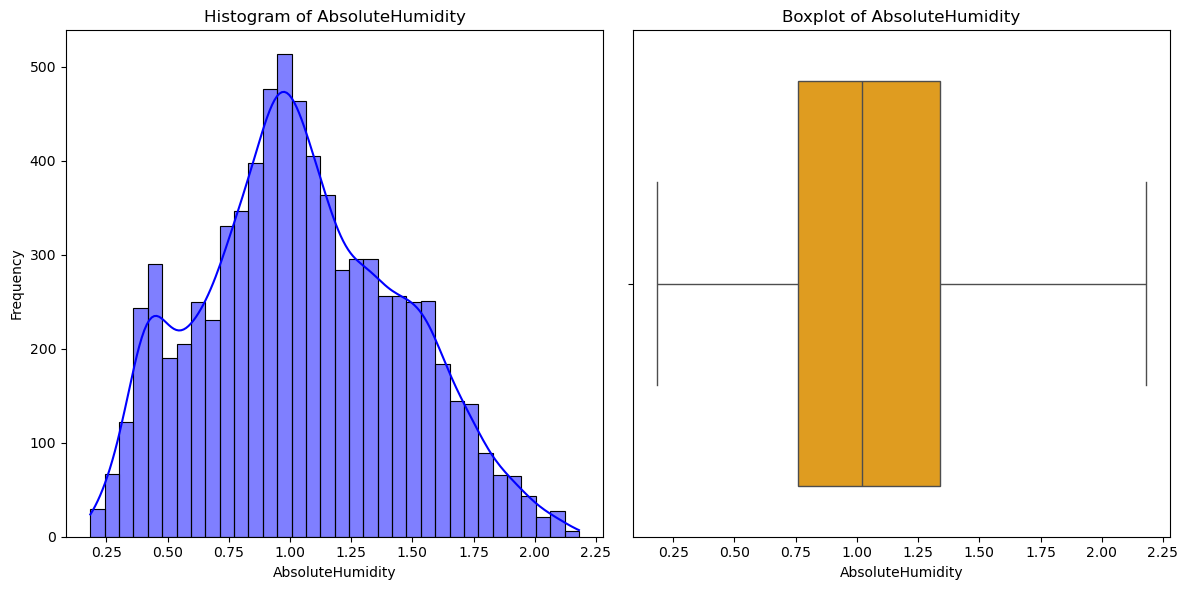

In [237]:
# Select numeric columns only
numeric_columns = air_data_filtered.select_dtypes(include=['float']).columns

# Loop through each column and create subplots
for column in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram on the left
    sns.histplot(data=air_data_filtered, x=column, kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot on the right
    sns.boxplot(data=air_data_filtered, x=column, ax=axes[1], color='orange')
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

## Correlation between each attributes

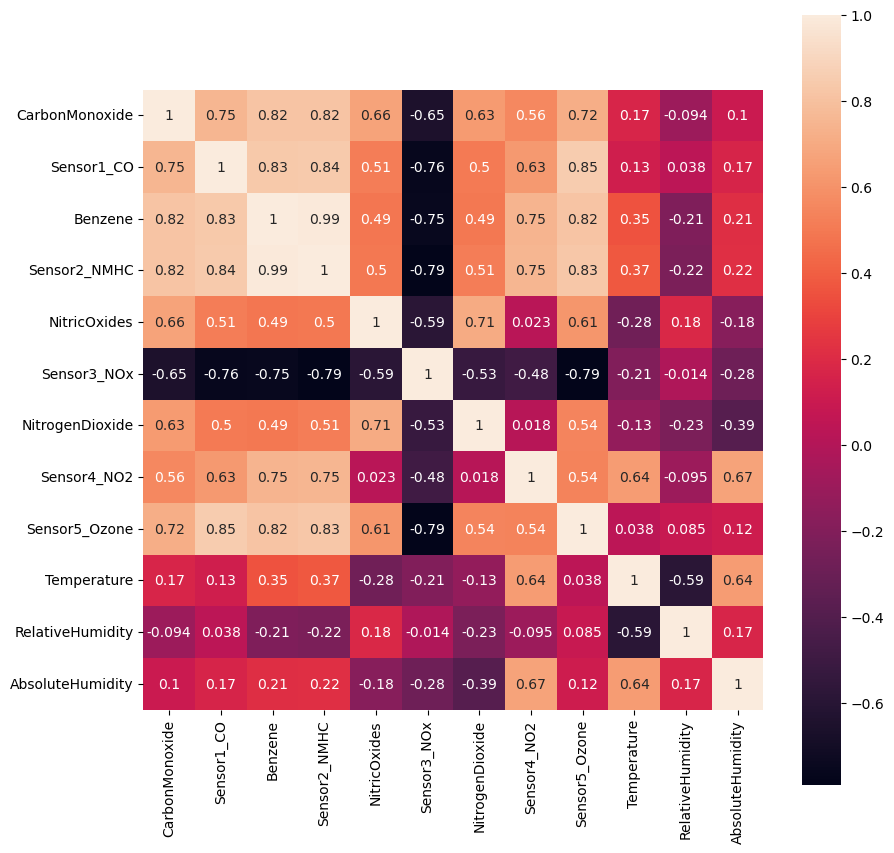

In [249]:
correlation = air_data_filtered.iloc[:,1:].corr()
fig_corr= plt.gcf();
fig_corr.set_size_inches(10,10);
sns.heatmap(correlation,annot = True, square = True)

plt.show()

## Scatter Plots against time 

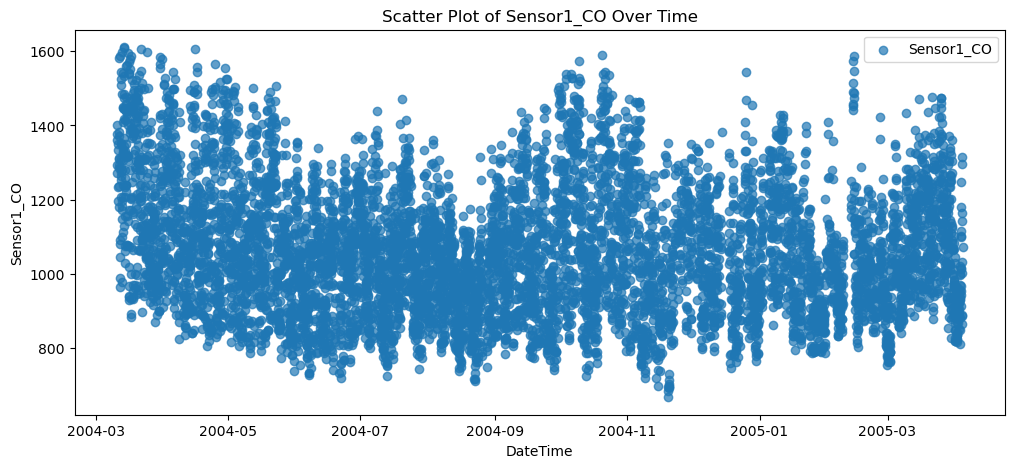

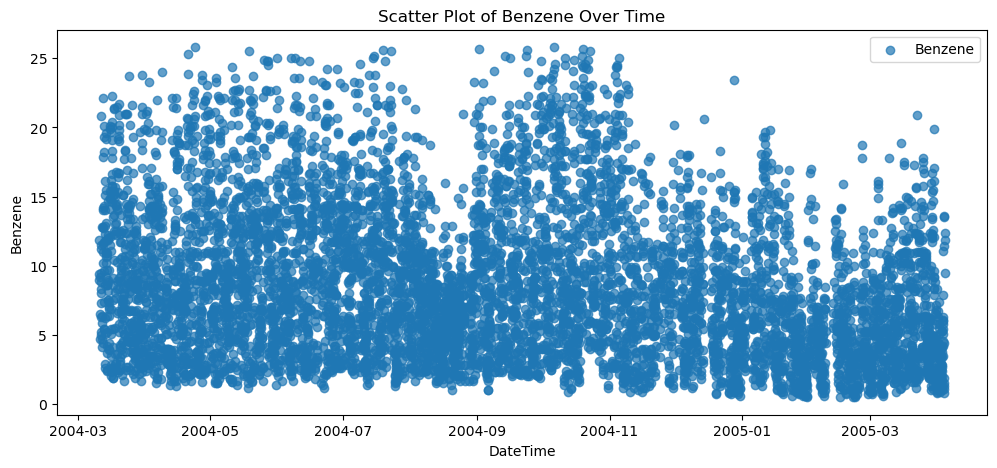

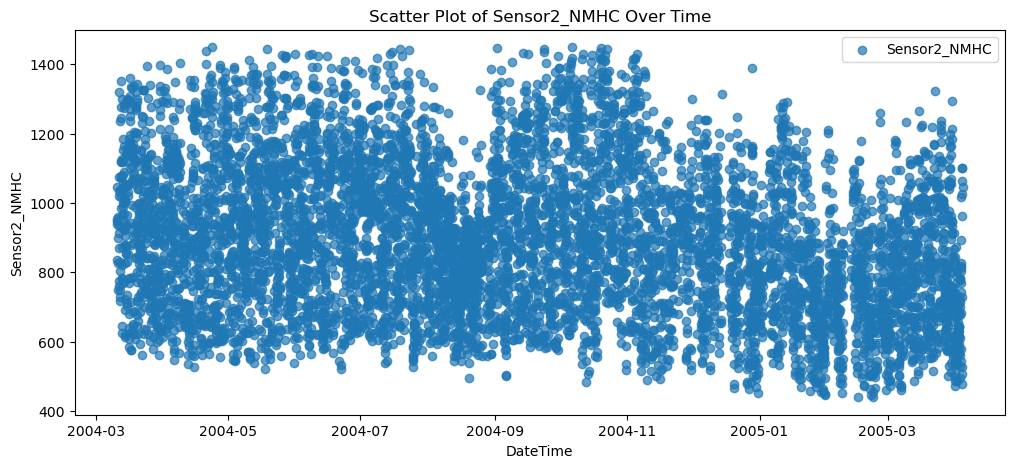

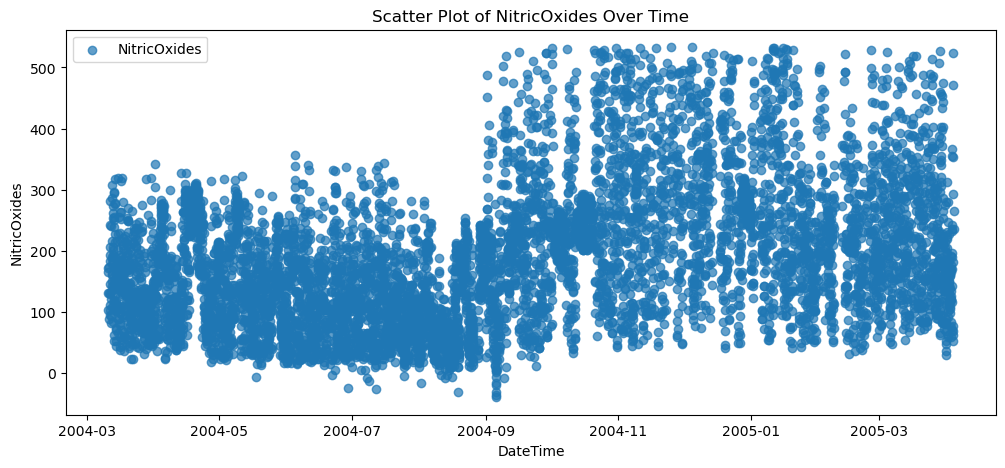

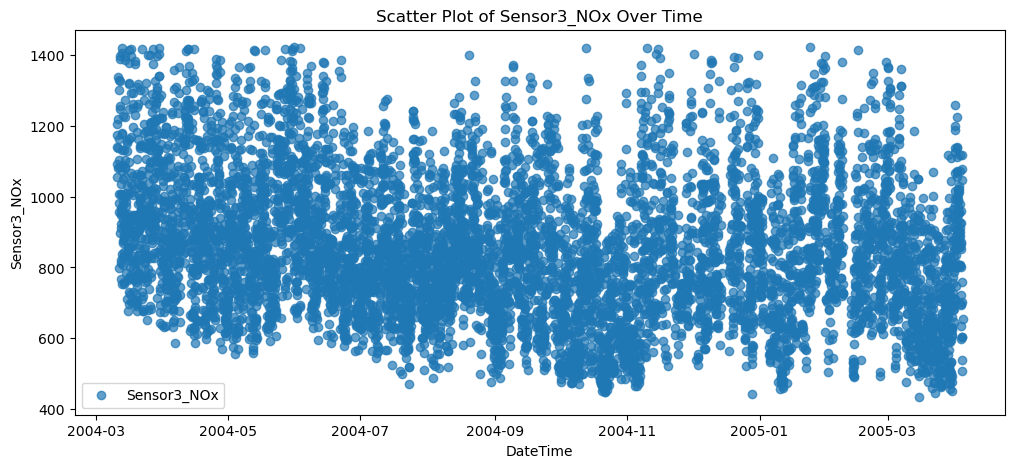

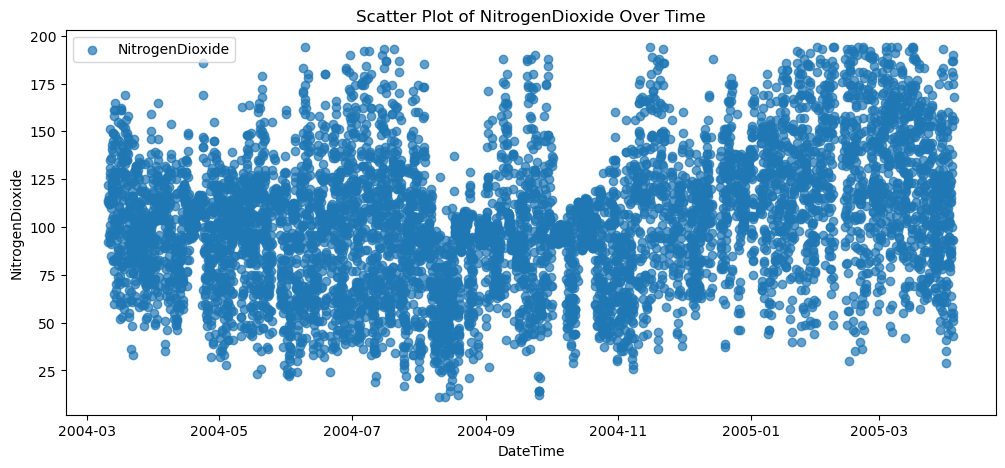

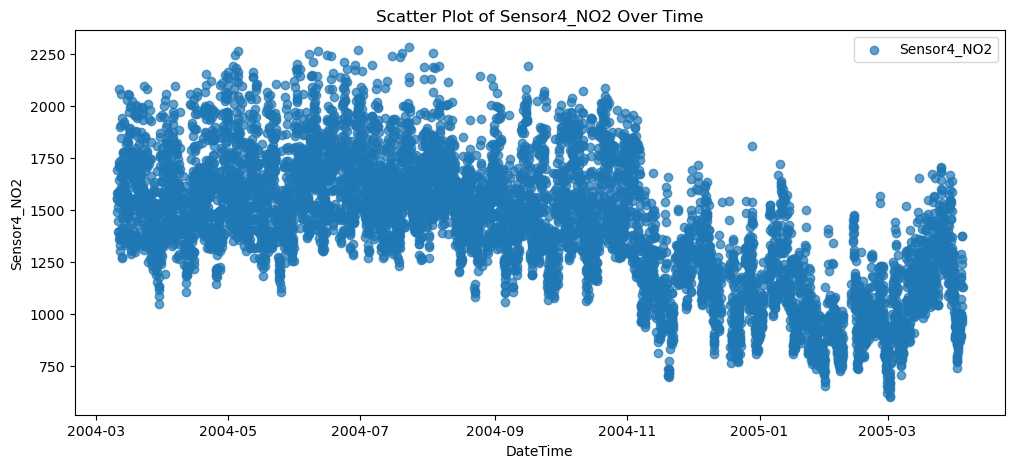

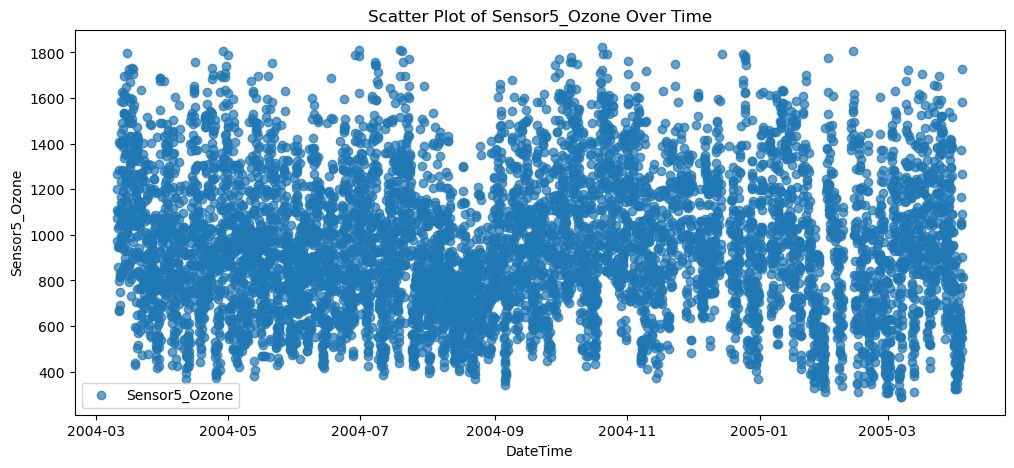

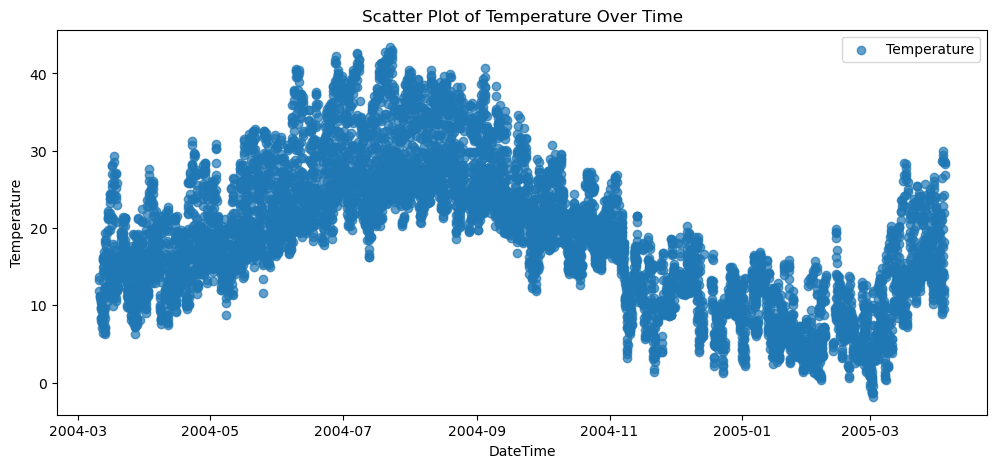

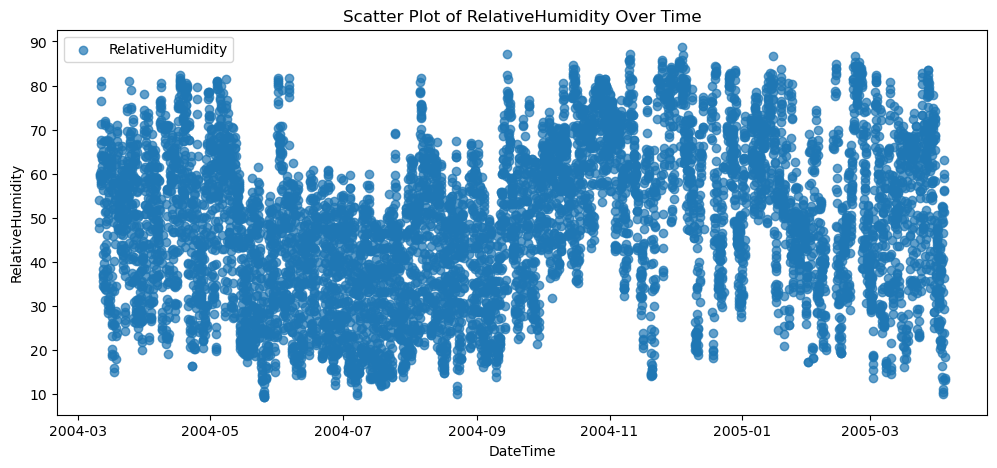

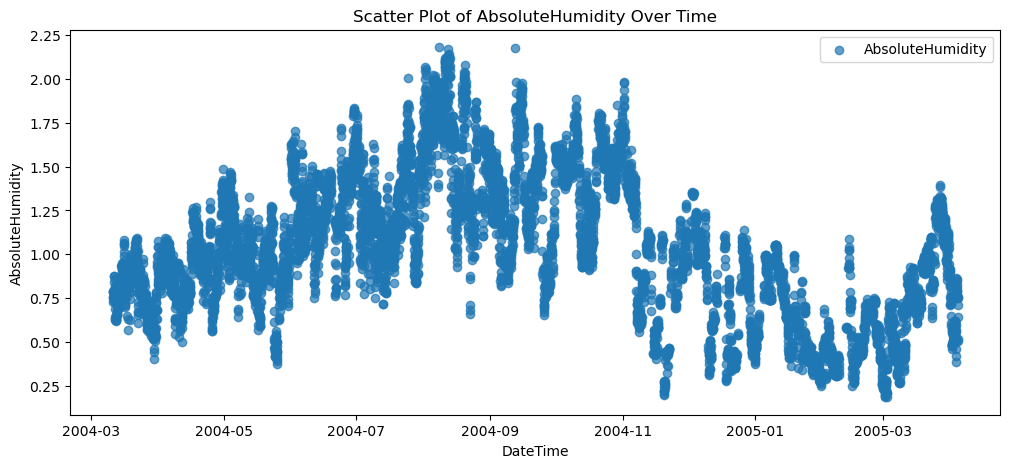

In [268]:
# Loop  to create scatter plots
for i in air_data_filtered.columns[2:13]:  
    plt.figure(figsize=(12, 5))
    # Create scatter plot
    plt.scatter(x=air_data_filtered["DateTime"], y=air_data_filtered[i], label=i, alpha=0.7)
    
    # Add labels and title
    plt.xlabel("DateTime")
    plt.ylabel(i)
    plt.title(f"Scatter Plot of {i} Over Time")
    plt.legend()
    
    # Show plot
    plt.show()